## Document Processing

In [1]:
from Document_Image_Processing import DocumentImagePreprocessing
doc = DocumentImagePreprocessing()

#### 1- PDF TO IMAGES

In [2]:
#Generating images from multi-pages pdf
pdf_folder = "SamplePDFs"
images_folder = "OutputOfDocPipeline/Pdfs2Images"

doc.process_multiple_pdfs(pdf_folder=pdf_folder, output_folder=images_folder)

#### 2- GET PREPROCESSED IMAGES

In [3]:
#Enchancing Image Results
prep_images_folder='OutputOfDocPipeline/enhancedImages'

doc.get_preprocessed_images(input_folder=images_folder, output_folder=prep_images_folder)

## Document OCR

In [1]:
#Importing OCR Functionalities
from Document_OCR import DocumentOCR
doc = DocumentOCR()

[2024/01/10 16:51:38] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/root/anac

In [5]:
#Paddle OCR & Pyt OCR
ocr_folder = 'OutputOfDocPipeline/OCR-RESULTS'
prep_images_folder='OutputOfDocPipeline/enhancedImages'

doc.perform_ocr(input_folder=prep_images_folder, output_folder=ocr_folder)

MAILING_2023_12_28_14_49_03_1703756943-Yhs3611703756943_8_opt
Pytesseract OCR Generated!
[2023/12/28 14:08:47] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/12/28 14:08:48] ppocr DEBUG: dt_boxes num : 32, elapse : 0.6119170188903809
[2023/12/28 14:08:50] ppocr DEBUG: rec_res num  : 32, elapse : 2.077162504196167
PaddleOCR OCR Generated!
Pytesseract OCR Generated!
[2023/12/28 14:08:52] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/12/28 14:08:52] ppocr DEBUG: dt_boxes num : 33, elapse : 0.5468826293945312
[2023/12/28 14:08:56] ppocr DEBUG: rec_res num  : 33, elapse : 3.2215216159820557
PaddleOCR OCR Generated!
Pytesseract OCR Generated!
[2023/12/28 14:08:59] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/12/28 14:09:00] ppocr DEBUG

In [2]:
#Hybrid OCR Result
#input_folder = 'OCR-TEXT/MAILING'
ocr_folder = 'OutputOfDocPipeline/OCR-RESULTS'
output_folder= "OutputOfDocPipeline/HYBRID-OCR-RESULT"
mode = 'hybrid'

doc.get_hybridized_result(input_dir=ocr_folder,output_dir=output_folder, mode=mode)

In [3]:
#Merge multiple txt ocr to single txt file
import os
import shutil
from Document_Text_Processing import TextProcessor
text_processor = TextProcessor()

In [4]:
merge_files_path = "OutputOfDocPipeline/HYBRID-OCR-RESULT"
text_processor.merge_files(merge_files_path)

In [1]:
from Document_Extraction import DocumentInformationExtraction
import os
import json
from fuzzywuzzy import fuzz
import re
import pandas as pd

def extract_values(input_string):
    pattern = r'"([^"]*)"'
    matches = re.findall(pattern, input_string)
    return matches

def read_values_from_excel(file_path, column_name):
    try:
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path)

        # Check if the specified column exists
        if column_name not in df.columns:
            print(f"Column '{column_name}' not found in the sheet.")
            return None

        # Extract all unique values from the specified column
        first_value = df.at[0, column_name]
        print(type(first_value))
        return first_value

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
file_path = 'Updated_Final.xlsx'  # Replace with your Excel file path
column_name = 'Extraction'  # Replace with the desired column name

values_list= read_values_from_excel(file_path, column_name)


result_list = extract_values(values_list)
print(result_list)


#sample_keys = result_list
#sample_keys.add()
sample_keys = result_list
sample_keys.append('title_of_document')


2024-01-10 16:57:28.308187: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-10 16:57:28.352292: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-10 16:57:29.170079: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<class 'str'>
['PATIENT FIRST NAME', 'PATIENT LAST NAME', 'CLAIM NO', 'PROVIDER NAME', 'DATE OF BIRTH', 'SSN', 'ADJ NO', 'AMOUNT', 'DOCUMENT TITLE', 'DATE OF INJURY', 'ATTORNEY OR INSURANCE', 'DATE ISSUED', 'DATE OF SERVICE', 'FILED BY MLM (YES OR NO)', 'FILED DATE', 'HEARING DATE', 'HEARING TYPE', 'ICN & DCN #', 'NOTICE OF PURCHASE AVAILABLE', 'OBJECTIONS CODE', 'POS AVAILABLE', 'PRECENTAGE', '10550 AVAILABLE', '10770.5 AVAILABLE', '10863 AVAILABLE', '4903.8 AVAILABLE']


/root/anaconda3/envs/py39/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
def find_similar_keys(sample_keys, keys, threshold=80):
    similar = []
    for key in keys:
        for sample_key in sample_keys:
            similarity_ratio = fuzz.ratio(key.lower(), sample_key.lower())
            if similarity_ratio >= threshold:
                similar.append(key)
                break  # Move to the next key once a match is found
    return similar

def flatten_json(json_obj, parent_key='', sep='_'):
    flattened = {}
    for key, value in json_obj.items():
        new_key = f"{parent_key}{sep}{key}" if parent_key else key
        if isinstance(value, dict):
            flattened.update(flatten_json(value, new_key, sep=sep))
        else:
            flattened[new_key] = value
    return flattened

assistant = DocumentInformationExtraction()
directory_path = 'OutputOfDocPipeline/HYBRID-OCR-RESULT'

for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith(".txt"):
            file_path = os.path.join(root, file)
            print("Inside Main", file_path)

            response = assistant.generate_response(file_path, result_list)
            response = response.strip()
            pattern = r'```+json(.*?)```+'

            # Use re.search to find the first match
            match = re.search(pattern, response, re.DOTALL)
            

            # Check if a match is found before printing
            if match:
                json_str = match.group(1)
                try:
                    # Try to load the JSON string into a Python object
                    json_obj = json.loads(json_str)
                    
                    flattened_json = flatten_json(json_obj)
                    
                    #print(flattened_json)
                    #Get only similar keys
                    similar_keys = find_similar_keys(sample_keys, flattened_json.keys())

                    #Create a new dictionary with only similar keys
                    filtered_json = {key: flattened_json[key] for key in similar_keys}

                    # Print the filtered JSON
                    print("Filtered JSON:")
                    print(json.dumps(filtered_json, indent=2))
                    print("----")
                    # Save the response as a JSON file in the same directory
                    json_file_path = os.path.splitext(file_path)[0] + ".json"
                    with open(json_file_path, 'w') as json_file:
                        json.dump(filtered_json, json_file, indent=2)

                except json.JSONDecodeError as e:
                    json_file_path = os.path.splitext(file_path)[0] + ".json"
                    with open(json_file_path, 'w') as json_file:
                        json.dump(json_str, json_file, indent=2)
                    print(f"Error decoding JSON: {e}")


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_01_14_49_11_1690883351_0_23_opt/BILLING_259_2023_08_01_14_49_11_1690883351_0_23_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Gentle",
  "patient_last_name": "Williams",
  "claim_no": "IRCA",
  "provider_name": "Sedgwick Claims Management Services",
  "date_of_birth": "08161961M",
  "ssn": "549-67-9042",
  "adj_no": null,
  "amount": null,
  "document_title": "HEALTH INSURANCE CLAIM FORM",
  "date_of_injury": null,
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "HEALTH INSURANCE CLAIM FORM"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_28_opt_0/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_28_opt_0_merged.txt
Inside Extraction
After 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": null,
  "patient_last_name": null,
  "claim_no": "ADJ15226483",
  "provider_name": "Peatman Law Group, PC",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "NOTICE OF TAKING DEPOSITION AND NOTICE FOR PRODUCTION OF DOCUMENTS AND TANGIBLE THINGS",
  "date_of_injury": null,
  "attorney_or_insurance": "Berkshire Hathaway Homestate Companies",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "NOTICE OF TAKING DEPOSITION AND NOTICE FOR PRODUCTION OF DOCUMENTS AND TANGIBLE THINGS"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037_0

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "KIMBERLY",
  "patient_last_name": "HURTADO",
  "provider_name": "HAMLIN PSYCHE CENTER",
  "date_of_birth": "11/21/1980",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "PROGRESS NOTE",
  "date_of_injury": "7/1/2019",
  "attorney_or_insurance": "HARTFORD INSURANCE",
  "date_issued": "02-24-20",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_38_1690896038-CWbB581690896038_0_4_opt/BILLING_276_2023_08_01_18_20_38_1690896038-CWbB581690896038_0_4_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "JUAN",
  "patient_last_name": "cRUz",
  "claim_no": "2080260950",
  "provider_name": "GAYLE WINDMAN Ph.D.",
  "date_of_birth": "07/09/1969",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "12/10/2008",
  "attorney_or_insurance": "Liberty Mutual Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_02_14_38_06_1690969086-QFkg181690969086_35_opt_0/MAILING_2023_08_02_14_38_06_1690969086-QFkg181690969086_35_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "MARIA",
  "patient_last_name": "ESCATEL",
  "claim_no": "2705560",
  "provider_name": "HORUS MULTISPECIALTY MEDICAL",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": 1624.11,
  "document_title": "QuicRemit Payment Notification",
  "date_of_injury": null,
  "attorney_or_insurance": null,
  "date_issued": "08/01/2023",
  "date_of_service": "04/27/2023",
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_15_16_28_20_1692098900-JIDC911692098900_0_13_opt/BILLING_276_2023_08_15_16_28_20_1692098900-JIDC911692098900_0_13_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Ramiro",
  "patient_last_name": "Ramirez",
  "claim_no": "44057447",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "11/24/1979",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "09/26/2018",
  "attorney_or_insurance": "Berkshire Hathaway Homestate",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_16_25_28_1691061928_6_opt_0/MAILING_2023_08_03_16_25_28_1691061928_6_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "ROSELIA",
  "patient_last_name": "ORTIZ",
  "claim_no": [
    "1",
    "2",
    "3",
    "4",
    "5"
  ],
  "provider_name": null,
  "date_of_birth": "10/28/1965",
  "ssn": "j613126839",
  "adj_no": [
    "ADJ1328537"
  ],
  "amount": null,
  "document_title": "COMPROMISE AND RELEASE",
  "date_of_injury": [
    "09/01/2001"
  ],
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_48_opt/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_48_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "MARIA",
  "patient_last_name": "VELIz",
  "claim_no": "wA184696",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "12/24/1957",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "01/15/2015",
  "attorney_or_insurance": "Mitsui Sumitomo Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804_0_7_opt/BILLING_276_2023_08_02_14_16_44_1690967804_0_7_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Diahna",
  "patient_last_name": "Beltran",
  "claim_no": "FNV6487",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "05/15/1987",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "02/01/2017",
  "attorney_or_insurance": "Travelers",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185_0_19_opt/BILLING_276_2023_08_24_11_39_45_1692859185_0_19_opt_merged.txt
Inside Extraction
After Extraction


/root/anaconda3/envs/py39/lib/python3.9/site-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "CARMEN",
  "patient_last_name": "FLORES-DAVIS",
  "claim_no": "Y67c01183",
  "provider_name": "GAYLE WINDMAN Ph.D.",
  "date_of_birth": "05/25/1972",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "08/24/2015",
  "attorney_or_insurance": "The Hartford",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_14_58_39_1691143119-J3B1751691143119_10_opt_0/MAILING_2023_08_04_14_58_39_1691143119-J3B1751691143119_10_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Amelia",
  "patient_last_name": "Gonzalez",
  "claim_no": "22010873D",
  "provider_name": "FMR Interventional Quality Pain Management APC",
  "date_of_birth": "07/23/1978",
  "ssn": "XXX-XX-8722",
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "05/03/2006",
  "attorney_or_insurance": null,
  "date_issued": "07/25/2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "Provider's Request for Second Bill Review"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_15_16_28_20_1692098900-JIDC911692098900_0_12_opt/BILLING_276_2023_08_15_16_28_20_169

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Ramiro",
  "patient_last_name": "Ramirez",
  "claim_no": "44057447",
  "provider_name": "GAYLE WINDMAN Ph.D.",
  "date_of_birth": "11/24/1979",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "09/26/2018",
  "attorney_or_insurance": "Berkshire Hathaway HomeState",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_24_opt/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_24_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Cruz",
  "patient_last_name": "Gastelum",
  "claim_no": "1341-wc-20-0001015",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "11/22/1975",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "05/21/2001",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_15_45_07_1691059507_33_opt_0/MAILING_2023_08_03_15_45_07_1691059507_33_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Julie",
  "patient_last_name": "Szathmary",
  "claim_no": "ADJ10717784",
  "provider_name": "Molina Healthcare Inc; Gallagher Basset Services",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": 185098,
  "document_title": "ORDER APPROVING COMPROMISE AND RELEASE",
  "date_of_injury": null,
  "attorney_or_insurance": "DRASIN YEE LOS ANGELES.",
  "date_issued": "8-1-2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_28_opt/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_28_opt_merged.txt
Inside Extraction
After Ex

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Thomas",
  "patient_last_name": "Curtis",
  "claim_no": "VP010587J",
  "provider_name": "THOMAS A. CURTIS, M.D.",
  "date_of_birth": "1962-03-23",
  "ssn": null,
  "adj_no": null,
  "amount": 25.49,
  "document_title": "DESCRIPTIONOESECURIY.FE",
  "date_of_injury": null,
  "attorney_or_insurance": "spamish",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": "his0323onotbrieit",
  "objections_code": null,
  "pos_available": 76,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_15_56_57_1690887417-6U6v231690887417_23_opt_0/MAILING_2023_08_01_15_56_57_1690887417-6U6v231690887417_23_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "JESUS",
  "patient_last_name": "PRADO",
  "claim_no": "ADJ14212131",
  "provider_name": "LA |LADESSERTS INC",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": "$0.00",
  "document_title": "DECLARATION OF READINESS TO PROCEED",
  "date_of_injury": null,
  "attorney_or_insurance": "CHERNOW PINE",
  "date_issued": "07/31/2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": "2024/01/09-13:30:00",
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_13_40_53_1690879253-T8bX281690879253_12_0/MAILING_2023_08_01_13_40_53_1690879253-T8bX281690879253_12_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "YAZMAIN",
  "patient_last_name": "ROJAS JIMENEZ",
  "claim_no": "189379239-001",
  "provider_name": "FMR INTERVENTIONAL QUALITY PAIN MAN",
  "date_of_birth": "UNKNOWN",
  "ssn": "*****7345",
  "adj_no": "1928980588",
  "amount": 0.0,
  "document_title": "Notification of Non-Payment",
  "date_of_injury": "10/21/2020",
  "attorney_or_insurance": "UNIVERSITY OF SOUTHERN CALIFORNIA",
  "date_issued": "07/31/2023",
  "date_of_service": "05/10/2023",
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objecctions_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_22_opt/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_22_opt_merged.

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Cruz",
  "patient_last_name": "Gastelum",
  "claim_no": "1341-wc-20-0001015",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "11/22/1975",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "05/21/2001",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804_0_6_opt/BILLING_276_2023_08_02_14_16_44_1690967804_0_6_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Diahna",
  "patient_last_name": "Beltran",
  "claim_no": "FNV6487",
  "provider_name": "JUDITH SCHWAFEL Ph.D.",
  "date_of_birth": "05/15/1987",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "02/01/2017",
  "attorney_or_insurance": "Travelers",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_02_14_19_41_1690967981-lkbh281690967981_1_0/MAILING_2023_08_02_14_19_41_1690967981-lkbh281690967981_1_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": null,
  "patient_last_name": null,
  "claim_no": "ADJ 8D5G59O",
  "provider_name": "3Q0Z MLANd EMPiRI",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": 7873.43,
  "document_title": "STIPULATION AND ORDER: TO PAY LIEN CLAIMANT",
  "date_of_injury": null,
  "attorney_or_insurance": "BNa.ste BlZ",
  "date_issued": "3/2/2016",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_19_25_07_1691072707-qWG3131691072707_33_opt_0/MAILING_2023_08_03_19_25_07_1691072707-qWG3131691072707_33_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Doris",
  "patient_last_name": "Barahona",
  "claim_no": [
    "ADJ13242110",
    "ADJ13242117"
  ],
  "provider_name": null,
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Order Re Dismissal",
  "date_of_injury": null,
  "attorney_or_insurance": [
    "Edward Figaredo",
    "Statewide Interpreters"
  ],
  "date_issued": "7/19/2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_52_opt/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_52_opt_merged.txt
Inside Extraction
After Extractio

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "MARIA",
  "patient_last_name": "VELIz",
  "claim_no": "wA184696",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "12/24/1957",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "01/15/2015",
  "attorney_or_insurance": "Mitsui Sumitomo Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_53_opt/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_53_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "MARIA",
  "patient_last_name": "VELIz",
  "claim_no": "wA184696",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "12/24/1957",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "01/15/2015",
  "attorney_or_insurance": "Mitsui Sumitomo Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_13_40_53_1690879253-T8bX281690879253_11_opt_0/MAILING_2023_08_01_13_40_53_1690879253-T8bX281690879253_11_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Oscar",
  "patient_last_name": "Leon",
  "claim_no": "189572236-001",
  "provider_name": "Fmr interventional Quality Pain Man",
  "date_of_birth": null,
  "ssn": "*****1943",
  "adj_no": "1928980614",
  "amount": 0.0,
  "document_title": "Notification of Non-Payment",
  "date_of_injury": "07/12/2021",
  "attorney_or_insurance": null,
  "date_issued": "07/31/2023",
  "date_of_service": "12/07/2022",
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_18_56_36_1691070996-QBho491691070996_20_opt_0/MAILING_2023_08_03_18_56_36_1691070996-QBho491691070996_20_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": null,
  "patient_last_name": "CANOVA",
  "claim_no": "ADJ15133267",
  "provider_name": "UNIVERSAL PROTECTION SERVICE, PSI DBA ALLIED UNIVERSAL SECURITY",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "ORDER DISMISSING CASE",
  "date_of_injury": null,
  "attorney_or_insurance": [
    "MED LEGAL SERVICES",
    "ALLIED UNIVERSAL SECURITY SERVICES"
  ],
  "date_issued": "July 17, 2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_02_1691396222_0_25_opt/BILLING_276_2023_08_07_13_17_02_1691396222_0_25_opt_merged.txt
Inside Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "RUBY",
  "patient_last_name": "WILLIAMS",
  "claim_no": "06310934",
  "provider_name": "GAYLE WINDMAN Ph.D.",
  "date_of_birth": "10/23/1963",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "12/01/2015",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_11_11_25_41_1691735141-6z5H871691735141_0_0_opt/BILLING_276_2023_08_11_11_25_41_1691735141-6z5H871691735141_0_0_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Jose Juan",
  "patient_last_name": "Martinez",
  "claim_no": "LB001071917",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "05/25/1964",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "08/01/2011",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185_0_14_opt/BILLING_276_2023_08_24_11_39_45_1692859185_0_14_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "CARMEN",
  "patient_last_name": "FLORES-DAVIS",
  "claim_no": "Y67c01183",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "05/25/1972",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "08/24/2015",
  "attorney_or_insurance": "The Hartford",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_32_opt/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_32_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Carmen",
  "patient_last_name": "Franco",
  "claim_no": "3124189-1",
  "provider_name": "LYNN GREENSPAN MFT",
  "date_of_birth": "10/31/1965",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "01/13/1997",
  "attorney_or_insurance": "AmTrust North America",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_15_16_28_20_1692098900-JIDC911692098900_0_11_opt/BILLING_276_2023_08_15_16_28_20_1692098900-JIDC911692098900_0_11_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Ramiro",
  "patient_last_name": "Ramirez",
  "claim_no": "44057447",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "11/24/1979",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "09/26/2018",
  "attorney_or_insurance": "Berkshire Hathaway Homestate",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185_0_17_opt/BILLING_276_2023_08_24_11_39_45_1692859185_0_17_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "CARMEN",
  "patient_last_name": "FLORES-DAVIS",
  "claim_no": "Y67c01183",
  "provider_name": "GAYLE WINDMAN Ph.D.",
  "date_of_birth": "05/25/1972",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "08/24/2015",
  "attorney_or_insurance": "The Hartford",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_20_opt_0/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_20_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "provider_name": "Dash Diagnostic Medical"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_15_56_57_1690887417-Z9sZ441690887417_1_opt_0/MAILING_2023_08_01_15_56_57_1690887417-Z9sZ441690887417_1_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "EDUARDO",
  "patient_last_name": "DIAZ",
  "claim_no": "ADJ14771479",
  "provider_name": "UNITED SERVICES PLUS DBA RONCO DRUG",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "DECLARATION OF READINESS TOPROCEED",
  "date_of_injury": null,
  "attorney_or_insurance": null,
  "date_issued": "07/31/2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037-7Oee481690896037_0_22_opt/BILLING_276_2023_08_01_18_20_37_1690896037-7Oee481690896037_0_22_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "LISA",
  "patient_last_name": "EspINoZA",
  "claim_no": "3000-01-01710",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "06/23/1965",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "01/01/1984",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-rAhK981690967804_0_5_opt/BILLING_276_2023_08_02_14_16_44_1690967804-rAhK981690967804_0_5_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Felipe",
  "patient_last_name": "Santa Cruz",
  "provider_name": "THOMAS A. CURTIS, M.D.",
  "date_of_birth": "1968-02-05",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "HAMLIN PSYCHE CENTER PROGRESS NOTE",
  "date_of_injury": "2017-12-07",
  "attorney_or_insurance": "LIBERTY MUTUAL",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_14_43_33_1690883013_4_opt_0/MAILING_2023_08_01_14_43_33_1690883013_4_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Maria",
  "patient_last_name": "Hernandez",
  "claim_no": "ADJ12260892",
  "provider_name": "DOWNEY INDUSTRIAL MED GRP INC",
  "date_of_birth": null,
  "ssn": "***_***8991",
  "adj_no": null,
  "amount": null,
  "document_title": "MINUTES OF HEARING",
  "date_of_injury": "[05/03/2318-05/03/2019]",
  "attorney_or_insurance": "AF Group",
  "date_issued": "06/28/2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": "06/28/2023",
  "hearing_type": "HEARING",
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "MINUTES OF HEARING"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185_0_16_opt/BILLING_276_2023_08_24_11_39_45_1692859185_0_16_opt_merged.txt
Inside Extraction
After Ex

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "CARMEN",
  "patient_last_name": "FLORES-DAVIS",
  "claim_no": "Y67c01183",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "05/25/1972",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "08/24/2015",
  "attorney_or_insurance": "The Hartford",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037_0_9_opt/BILLING_276_2023_08_01_18_20_37_1690896037_0_9_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Kimberly",
  "patient_last_name": "Hurtado",
  "claim_no": "19001386",
  "provider_name": "Hamlin Psyche Center",
  "date_of_birth": "11/21/1980",
  "ssn": "560-93-8056",
  "adj_no": null,
  "amount": null,
  "document_title": "REQUESTFORAUTHORIZATION FOR TREATMENT ATTENDING AND EVALUATING PHYSICIAN\u2019S FOLLOW-UP REPORT ONINITIATION OF PSYCHOTHERAPY",
  "date_of_injury": "07/01/2019",
  "attorney_or_insurance": "Hartford Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "REQUESTFORAUTHORIZATION FOR TREATMENT ATTENDING AND EVALUATING PHYSICIAN\u2019S FOLLOW-UP REPORT ONINITIATION OF PSYCHOTHERAPY"
}
----
Inside Main Ou

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Lara",
  "patient_last_name": "Manijikian",
  "claim_no": "002407-003515-wc-01",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "03/30/1984",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "06/09/2012",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_02_1691396222_0_23_opt/BILLING_276_2023_08_07_13_17_02_1691396222_0_23_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "RUBY",
  "patient_last_name": "WILLIAMS",
  "claim_no": "06310934",
  "provider_name": "GAYLE WINDMAN Ph.D.",
  "date_of_birth": "10/23/1963",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "12/01/2015",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804_0_0_opt/BILLING_276_2023_08_02_14_16_44_1690967804_0_0_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Dianna",
  "patient_last_name": "Beltran",
  "provider_name": "THOMAS A.-CURTIS, M.D.",
  "date_of_birth": "1987-05-15",
  "ssn": "Vis+zril SOma#bO",
  "adj_no": null,
  "amount": null,
  "document_title": "HAMLIN PSYCHE CENTER PROGRESS NOTE",
  "date_of_injury": "2017-02-01, 2019-11-19, 2019-10-08",
  "attorney_or_insurance": "TRAVELERS INSURANCE",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_02_1691396222_0_22_opt/BILLING_276_2023_08_07_13_17_02_1691396222_0_22_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "RUBY",
  "patient_last_name": "WILLIAMS",
  "claim_no": "06310934",
  "provider_name": "LYNN GREENSPAN MFT",
  "date_of_birth": "10/23/1963",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "12/01/2015",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_02_1691396222_0_24_opt/BILLING_276_2023_08_07_13_17_02_1691396222_0_24_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "RUBY",
  "patient_last_name": "WILLIAMS",
  "claim_no": "06310934",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "10/23/1963",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "12/01/2015",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_54_opt/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_54_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "ANTONIO",
  "patient_last_name": "CASTANEDA",
  "claim_no": "05968244",
  "provider_name": "Concepcion Aguirre",
  "date_of_birth": "06/13/1962",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "01/15/2014",
  "attorney_or_insurance": "State Compensation Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_14_43_33_1690883013_28_opt_0/MAILING_2023_08_01_14_43_33_1690883013_28_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Susana",
  "patient_last_name": "Rodriguez Reyes",
  "claim_no": "ADJ13001286",
  "provider_name": "DOWNEY INDUSTRIAL MED GRP INC",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "MINUTES OF HEARING",
  "date_of_injury": null,
  "attorney_or_insurance": "Connect Staffing, Inc",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": "07/27/2023",
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "MINUTES OF HEARING"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_07_13_12_56_1691395976-NuIs661691395976_14_opt_0/MAILING_2023_08_07_13_12_56_1691395976-NuIs661691395976_14_opt_0_merged.txt
Inside Extraction
After

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Maxine",
  "patient_last_name": "Corente",
  "claim_no": "ADJ9551349",
  "provider_name": "AETNA INC; GALLAGHER BASSETT SERVICES, INC.",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Third Findings of Fact, Award,Order,and Opinion on Decision",
  "date_of_injury": "November 16, 2012",
  "attorney_or_insurance": null,
  "date_issued": "June 5, 2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": "15%",
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_21_opt/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_21_opt_merged.txt
Inside Extracti

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_last_name": "Gastelum",
  "patient_first_name": "Cruz",
  "claim_no": "1341-wc-20-0001015",
  "provider_name": "GAYLE WINDMAN Ph.D.",
  "date_of_birth": "11/22/1975",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "05/21/2001",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_33_opt/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_33_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Carmen",
  "patient_last_name": "Franco",
  "claim_no": "3124189-1",
  "provider_name": "LYNN GREENSPAN MFT",
  "date_of_birth": "10/31/1965",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "01/13/1997",
  "attorney_or_insurance": "AmTrust North America",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_14_51_26_1691056286-7wvP441691056286_8_opt_0/MAILING_2023_08_03_14_51_26_1691056286-7wvP441691056286_8_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "CANICE",
  "patient_last_name": "NGERE",
  "claim_no": "ADJ13661218",
  "provider_name": null,
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": 15000.0,
  "document_title": "COMPROMISE AND RELEASE",
  "date_of_injury": null,
  "attorney_or_insurance": "AMERICAN ZURICH INS CO",
  "date_issued": "June 15,2021",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_15_16_07_27_1692097647-htoY821692097647_0_0_opt/BILLING_276_2023_08_15_16_07_27_1692097647-htoY821692097647_0_0_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Rafael",
  "patient_last_name": "Kimoyan",
  "claim_no": "0995-0000070",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "01/10/1960",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "02/15/2016",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_34_30_1691148870-Ccuc721691148870_4_opt_0/MAILING_2023_08_04_16_34_30_1691148870-Ccuc721691148870_4_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": null,
  "patient_last_name": null,
  "claim_no": "ADJ13552193",
  "provider_name": "Berkshire Hathaway Homestate Companies",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Notice of Deposition",
  "date_of_injury": null,
  "attorney_or_insurance": "Lance Peatman, Esq. (SBN: 261743)",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_35_opt/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_35_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Carmen",
  "patient_last_name": "Franco",
  "claim_no": "3124189-1",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "10/31/1965",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider\u2019s Request for Second Bill Review",
  "date_of_injury": "01/13/1997",
  "attorney_or_insurance": "AmTrust North America",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_34_opt/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_34_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Carmen",
  "patient_last_name": "Franco",
  "claim_no": "3124189-1",
  "provider_name": "LYNN GREENSPAN MFT",
  "date_of_birth": "10/31/1965",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "01/13/1997",
  "attorney_or_insurance": "AmTrust North America",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_15_41_43_1691059303-7hNR571691059303_9_opt_0/MAILING_2023_08_03_15_41_43_1691059303-7hNR571691059303_9_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": null,
  "patient_last_name": null,
  "claim_no": "ADJ 10946984",
  "provider_name": "MED LEGAL PHOTOCOPY",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": 377.91,
  "document_title": "STIPULATION AND ORDER TO PAY LIEN CLAIMANT",
  "date_of_injury": null,
  "attorney_or_insurance": "STATE COMPENSATION INSURANCE FUND",
  "date_issued": "7/24/2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_01_14_49_11_1690883351_0_18_opt/BILLING_259_2023_08_01_14_49_11_1690883351_0_18_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Gentle",
  "patient_last_name": "Williams",
  "claim_no": "PICA",
  "provider_name": "Sedgwick Claims Management Services",
  "date_of_birth": "08161961M",
  "ssn": "549-67-9042",
  "adj_no": null,
  "amount": "$2390.00",
  "document_title": "HEALTH INSURANCE CLAIM FORM",
  "date_of_injury": "3202015",
  "attorney_or_insurance": null,
  "date_issued": "4/4/2022",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "HEALTH INSURANCE CLAIM FORM"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_02_14_19_41_1690967981-lkbh281690967981_10_opt_0/MAILING_2023_08_02_14_19_41_1690967981-lkbh281690967981_10_opt_0_merged.txt
Inside 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": null,
  "patient_last_name": null,
  "claim_no": "ADJ10862496",
  "provider_name": "MedLegal Services, LP",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": 335.0,
  "document_title": "ORDER ALLOWING LIEN (S)",
  "date_of_injury": null,
  "attorney_or_insurance": "MedLegal Services, LLC",
  "date_issued": "8/01/2023",
  "date_of_service": "8/01/2023",
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_02_14_19_42_1690967982_6_opt_0/MAILING_2023_08_02_14_19_42_1690967982_6_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "AbertaEscobedo",
  "patient_last_name": "Escobedo",
  "claim_no": "7 32lBOD",
  "provider_name": "Liqhtoiur AS: 6enyte",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": "#95.4531.30",
  "amount": "s_30Y.",
  "document_title": "STIPULATION AND ORDER TO PAY LIEN CLAIMANT",
  "date_of_injury": null,
  "attorney_or_insurance": null,
  "date_issued": "MAR 1 6 2016",
  "date_of_service": "MAR 1 6 2016",
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "STIPULATION AND ORDER TO PAY LIEN CLAIMANT"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_52_opt/BILLING_276_2023_08_02_14_16_44_1690967804-vSns47169

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "ANTONIO",
  "patient_last_name": "CASTANEDA",
  "claim_no": "05968244",
  "provider_name": "Ivan Greenspan Psy.D.",
  "date_of_birth": "06/13/1962",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "01/15/2014",
  "attorney_or_insurance": "State Compensation Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_38_1690896038-CWbB581690896038_0_5_opt/BILLING_276_2023_08_01_18_20_38_1690896038-CWbB581690896038_0_5_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "JUAN",
  "patient_last_name": "CRUZ",
  "claim_no": "2080260950",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "07/09/1969",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "12/10/2008",
  "attorney_or_insurance": "Liberty Mutual Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185-6Vwj551692859185_0_55_opt/BILLING_276_2023_08_24_11_39_45_1692859185-6Vwj551692859185_0_55_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "ZARMINE",
  "patient_last_name": "BALASANYAN",
  "claim_no": "MCA900145125",
  "provider_name": "GAYLE WINDMAN Ph.D.",
  "date_of_birth": "05/05/1959",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "08/14/2016",
  "attorney_or_insurance": "Markel First Comp Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_15_56_57_1690887417-6U6v231690887417_2_opt_0/MAILING_2023_08_01_15_56_57_1690887417-6U6v231690887417_2_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Henry",
  "patient_last_name": "Garcia Gonzales",
  "claim_no": "ADJ14973019",
  "provider_name": null,
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": 0.0,
  "document_title": "DECLARATION OF READINESS TO PROCEED",
  "date_of_injury": null,
  "attorney_or_insurance": "EDWIN HARONIAN SHERMAN OAKS",
  "date_issued": "07/31/2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037_0_5_opt/BILLING_276_2023_08_01_18_20_37_1690896037_0_5_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Kimberly",
  "patient_last_name": "Hurtado",
  "provider_name": "Thomas Curtis M.D.",
  "date_of_birth": "11/21/1980",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Treating Physician's Progress Report (PR-2)",
  "date_of_injury": "7/1/2019",
  "attorney_or_insurance": "Hartford Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_01_14_49_11_1690883351_0_8_opt/BILLING_259_2023_08_01_14_49_11_1690883351_0_8_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Gentle",
  "patient_last_name": "Williams",
  "claim_no": "PICA",
  "provider_name": "Sedgwick Claims Management Services",
  "date_of_birth": "08161961M",
  "ssn": "549-67-9042",
  "adj_no": null,
  "amount": "$2,390.00",
  "document_title": "HEALTH INSURANCE CLAIM FORM",
  "date_of_injury": null,
  "attorney_or_insurance": null,
  "date_issued": "5/6/2022",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "HEALTH INSURANCE CLAIM FORM"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_07_13_12_56_1691395976-NuIs661691395976_6_opt_0/MAILING_2023_08_07_13_12_56_1691395976-NuIs661691395976_6_opt_0_merged.txt
Inside Extrac

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Maxine",
  "patient_last_name": "Corente",
  "claim_no": "ADJ9551349",
  "provider_name": "AETNA INC; GALLAGHER BASSETT 255397",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Third Findings of Fact, Award,Order,and Opinion on Decision",
  "date_of_injury": "November 16, 2012",
  "attorney_or_insurance": null,
  "date_issued": "June 5, 2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": "15%",
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037-7Oee481690896037_0_3_opt/BILLING_276_2023_08_01_18_20_37_1690896037-7Oee481690896037_0_3_opt_merged.txt
Inside Extraction
After E

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "THOMAS",
  "patient_last_name": "CURTIS",
  "claim_no": "VP010389J",
  "provider_name": "THOMAS A. CURTIS, M.D.",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": null,
  "date_of_injury": null,
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037_0_7_opt/BILLING_276_2023_08_01_18_20_37_1690896037_0_7_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "KIMBERLY",
  "patient_last_name": "HURTADO",
  "provider_name": "HAMLIN PSYCHE CENTER",
  "date_of_birth": "11/21/1980",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "PROGRESS NOTE",
  "date_of_injury": "7/1/2019",
  "attorney_or_insurance": "HARTFORD INSURANCE",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_01_14_49_11_1690883351_0_16_opt/BILLING_259_2023_08_01_14_49_11_1690883351_0_16_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Gentle",
  "patient_last_name": "Williams",
  "claim_no": "IRCA",
  "provider_name": "Sedgwick Claims Management Services",
  "date_of_birth": "08161961M",
  "ssn": "549-67-9042",
  "adj_no": null,
  "amount": null,
  "document_title": "HEALTH INSURANCE CLAIM FORM",
  "date_of_injury": null,
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "HEALTH INSURANCE CLAIM FORM"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037-7Oee481690896037_0_20_opt/BILLING_276_2023_08_01_18_20_37_1690896037-7Oee481690896037_0_20_opt_merged.txt
Inside Extractio

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "LISA",
  "patient_last_name": "EspINoZA",
  "claim_no": "3000-01-01710",
  "provider_name": "Curtis M.D.",
  "date_of_birth": "06/23/1965",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider\u2019s Request for Second Bill Review",
  "date_of_injury": "01/01/1984",
  "attorney_or_insurance": "Tristar Risk Management",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_15_45_07_1691059507_31_opt_0/MAILING_2023_08_03_15_45_07_1691059507_31_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "SYLVIA",
  "patient_last_name": "VASQUEZ",
  "claim_no": [
    "ADJ16326513",
    "ADJ8299228"
  ],
  "provider_name": [
    "JW MARRIOTT LOS ANGELES",
    "JW MARRIOTT LOS ANGELES",
    "MARRIOTT HOT SPRINGS"
  ],
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": 25000,
  "document_title": "JOINT ORDER APPROVING COMPROMISE AND RELEASE",
  "date_of_injury": null,
  "attorney_or_insurance": [
    "ROAN TUYAY",
    "ROAN TUYAY",
    "ADVANCE CARE",
    "CA MED",
    "COMPREHENSIVE TOXICOLOGY"
  ],
  "date_issued": "07-28-2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": null,
  "patient_last_name": null,
  "claim_no": "ADJ11599995",
  "provider_name": "DOWNEY INDUSTRIAL MED GRP INC",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "MINUTES OF HEARING",
  "date_of_injury": null,
  "attorney_or_insurance": "OLETTER DOOTELEPHONE (E-MAIL)",
  "date_issued": "7/5/2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": "7/5/2023",
  "hearing_type": "MSC",
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "MINUTES OF HEARING"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_14_52_01_1691056321-0G99161691056321_8_opt_0/MAILING_2023_08_03_14_52_01_1691056321-0G99161691056321_8_opt_0_merged.txt
Inside Extraction
After Extra

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "ALFONSO",
  "patient_last_name": "ESQUIVEL ESTRADA",
  "claim_no": "ADJ17263464",
  "provider_name": "WORKERS\u2019 COMPENSATION APPEALS BOARD",
  "date_of_birth": null,
  "ssn": "671-56-4854",
  "adj_no": null,
  "amount": "$12,750.00",
  "document_title": "COMPROMISE AND RELEASE",
  "date_of_injury": null,
  "attorney_or_insurance": "BRADFORD BARTHEL",
  "date_issued": "08/02/2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185_0_15_opt/BILLING_276_2023_08_24_11_39_45_1692859185_0_15_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "CARMEN",
  "patient_last_name": "FLORES-DAVIS",
  "claim_no": "Y67c01183",
  "provider_name": "GILDA RUELAS MFT",
  "date_of_birth": "05/25/1972",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "08/24/2015",
  "attorney_or_insurance": "The Hartford",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185_0_13_opt/BILLING_276_2023_08_24_11_39_45_1692859185_0_13_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "CARMEN",
  "patient_last_name": "FLORES-DAVIS",
  "claim_no": "Y67c01183",
  "provider_name": "GILDA RUELAS MFT",
  "date_of_birth": "05/25/1972",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "08/24/2015",
  "attorney_or_insurance": "The Hartford",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_03_14_1691146994-3tWg241691146994_22_opt_0/MAILING_2023_08_04_16_03_14_1691146994-3tWg241691146994_22_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": null,
  "patient_last_name": null,
  "claim_no": "ADJ13552193",
  "provider_name": "Berkshire Hathaway Homestate Companies",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Notice of Deposition",
  "date_of_injury": null,
  "attorney_or_insurance": "Lance Peatman, Esq. (SBN: 261743)",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_01_14_49_11_1690883351_0_20_opt/BILLING_259_2023_08_01_14_49_11_1690883351_0_20_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Gentle",
  "patient_last_name": "Williams",
  "claim_no": "PICA",
  "provider_name": "Sedgwick Claims Management Services",
  "date_of_birth": "08161961M",
  "ssn": "549-67-9042",
  "adj_no": null,
  "amount": "$2390.00",
  "document_title": "HEALTH INSURANCE CLAIM FORM",
  "date_of_injury": "3202015",
  "attorney_or_insurance": null,
  "date_issued": "4/4/2022",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "HEALTH INSURANCE CLAIM FORM"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_02_1691396222_0_26_opt/BILLING_276_2023_08_07_13_17_02_1691396222_0_26_opt_merged.txt
Inside Extraction
After Extractio

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "RUBY",
  "patient_last_name": "WILLIAMS",
  "claim_no": "06310934",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "10/23/1963",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "12/01/2015",
  "attorney_or_insurance": "State Compensation Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_01_14_49_11_1690883351_0_10_opt/BILLING_259_2023_08_01_14_49_11_1690883351_0_10_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Gentle",
  "patient_last_name": "Williams Delta D",
  "claim_no": "PICA",
  "provider_name": "Sedgwick Claims Manyagement Services",
  "date_of_birth": "08161961",
  "ssn": "549-67-9042",
  "adj_no": null,
  "amount": "$2390.00",
  "document_title": "HEALTH INSURANCE CLAIM FORM",
  "date_of_injury": "Y4 22001905b",
  "attorney_or_insurance": null,
  "date_issued": "5/5/2022",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "HEALTH INSURANCE CLAIM FORM"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_15_16_28_20_1692098900-0Lsj731692098900_0_58_opt/BILLING_276_2023_08_15_16_28_20_1692098900-0Lsj731692098900_0_58_o

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "FRANCISCA",
  "patient_last_name": "SAMANIEGO",
  "claim_no": "2018-0130",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "08/08/1948",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "11/20/1989",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_238_2023_08_28_19_11_51_1693231911_0_0_opt/BILLING_238_2023_08_28_19_11_51_1693231911_0_0_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Curtis",
  "patient_last_name": "Stewart",
  "claim_no": "132254719",
  "provider_name": "C. Brian Tang, M.D.",
  "date_of_birth": "2/3/1952",
  "ssn": "295-46-0387",
  "adj_no": null,
  "amount": null,
  "document_title": "Referral Slip",
  "date_of_injury": "7/21/2011",
  "attorney_or_insurance": "USPO-Injury Comp. Off",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_17_18_04_1691151484-p6yy631691151484_39_opt_0/MAILING_2023_08_04_17_18_04_1691151484-p6yy631691151484_39_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "HERNANDEZ",
  "patient_last_name": "RODRIGUEZ",
  "claim_no": "ADJ11858483",
  "provider_name": "THOMPSON ROOFING; SCIF",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": 340.0,
  "document_title": "ORDER ALLOWING LIEN (S)",
  "date_of_injury": null,
  "attorney_or_insurance": "MedLegal Services, LLC",
  "date_issued": "7/10/2023",
  "date_of_service": "7/6/2023",
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_03_18_08_15_1691068095-oXeT271691068095_0_3_opt/BILLING_259_2023_08_03_18_08_15_1691068095-oXeT271691068095_0_3_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Jonathan",
  "patient_last_name": "Rosen",
  "claim_no": null,
  "provider_name": "Jcr LawgrouP,inc.",
  "date_of_birth": "1983-10-09",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "REQUEST FOR IMPAIRMENTS OF ACTIVITIES OF DAILY LIVING (ADL) FUNCTIONAL CAPACITIES",
  "date_of_injury": "2015-02-09",
  "attorney_or_insurance": "Jcr LawgrouP,inc.",
  "date_issued": "2022-01-03",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_14_51_26_1691056286-LuZo81691056286_4_opt_0/MAILING_2023_08_03_14_51_26_1691056286-LuZo81691056286_4_opt_0_merged.txt
Inside Extraction
After Ex

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "JASON",
  "patient_last_name": "KELLY",
  "claim_no": "ADJ14358576",
  "provider_name": null,
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "ORDER OF DISMISSAL",
  "date_of_injury": null,
  "attorney_or_insurance": "POSITIVE INVESTMENTS, INC.",
  "date_issued": "5/27/2021",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_14_43_33_1690883013-57On301690883013_17_opt_0/MAILING_2023_08_01_14_43_33_1690883013-57On301690883013_17_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Juana",
  "patient_last_name": "Ruiz",
  "claim_no": "A00407463",
  "provider_name": "FMR Interventional Quality Pain Management APC",
  "date_of_birth": "07| 19| 1978",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "5/1/2021",
  "attorney_or_insurance": "Great American ins. Co.",
  "date_issued": null,
  "date_of_service": "4/3/2023 - 4/1 7/2023",
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "Provider's Request for Second Bill Review"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_16_opt_0/MAILING_2023_08_04_16

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": null,
  "patient_last_name": null,
  "claim_no": "ADJ13853976",
  "provider_name": "Berkshire Hathaway Homestate Companies",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": "ADJ13853976",
  "amount": null,
  "document_title": "Notice of Taking Deposition and Request for Production of Documents",
  "date_of_injury": null,
  "attorney_or_insurance": "Lance Peatman, Esq. (SBN: 261743)",
  "date_issued": "AUGUST 17,2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "Notice of Taking Deposition and Request for Production of Documents"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV15

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "MARIA",
  "patient_last_name": "VELIz",
  "claim_no": "wA184696",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "12/24/1957",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "01/15/2015",
  "attorney_or_insurance": "Mitsui Sumitomo Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_53_opt/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_53_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "ANTONIO",
  "patient_last_name": "CASTANEDA",
  "claim_no": "05968244",
  "provider_name": "Concepcion Aguirre",
  "date_of_birth": "06/13/1962",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "01/15/2014",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_12_49_24_1690876164_0_2_opt/BILLING_276_2023_08_01_12_49_24_1690876164_0_2_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "ABRAHAM",
  "patient_last_name": "RIVERA",
  "claim_no": "JYES",
  "provider_name": "THOMAS CURTIS, M.D., INC.",
  "date_of_birth": "08-16-1967",
  "ssn": "615-23-9849",
  "adj_no": null,
  "amount": "12.89",
  "document_title": "HEALTH INSURANCE CLAIM FORM",
  "date_of_injury": "01-01-2020",
  "attorney_or_insurance": null,
  "date_issued": "03-02-2020",
  "date_of_service": "03-02-2020",
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-rAhK981690967804_0_8_opt/BILLING_276_2023_08_02_14_16_44_1690967804-rAhK981690967804_0_8_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Felipe",
  "patient_last_name": "Santa Cruz",
  "provider_name": "THOMAS A. CURTIS, M.D.",
  "date_of_birth": "1968-02-05",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "HAMLIN PSYCHE CENTER PROGRESS NOTE",
  "date_of_injury": "2017-12-07",
  "attorney_or_insurance": "LIBERTY MUTUAL",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_12_49_24_1690876164_0_1_opt/BILLING_276_2023_08_01_12_49_24_1690876164_0_1_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_last_name": "RIVERA",
  "patient_first_name": "ABRAHAM",
  "claim_no": "Y419775158",
  "provider_name": null,
  "date_of_birth": "08:16:67",
  "ssn": "615-23-9849",
  "adj_no": null,
  "amount": "125.00",
  "document_title": "HEALTH INSURANCE CLAIM FORM",
  "date_of_injury": null,
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_12_49_24_1690876164_0_0_opt/BILLING_276_2023_08_01_12_49_24_1690876164_0_0_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "ABRAHAM",
  "patient_last_name": "RIVERA",
  "claim_no": "Y419775158",
  "provider_name": "THOMAS CURTIS, M.D., INC.",
  "date_of_birth": "08-16-1967",
  "ssn": "615-23-9849",
  "adj_no": null,
  "amount": 223.47,
  "document_title": "HEALTH INSURANCE CLAIM FORM",
  "date_of_injury": null,
  "attorney_or_insurance": null,
  "date_issued": "03/03/2020",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037_0_6_opt/BILLING_276_2023_08_01_18_20_37_1690896037_0_6_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "KIMBERLY",
  "patient_last_name": "HURTADO",
  "provider_name": "HARTFORD INSURANCE",
  "date_of_birth": "11/21/1980",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "PROGRESS NOTE",
  "date_of_injury": "7/1/2019",
  "attorney_or_insurance": "HARTFORD INSURANCE",
  "date_issued": null,
  "date_of_service": "1/14/2020",
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_34_30_1691148870-Ccuc721691148870_5_opt_0/MAILING_2023_08_04_16_34_30_1691148870-Ccuc721691148870_5_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": null,
  "patient_last_name": null,
  "claim_no": "ADJ13552193",
  "provider_name": "Berkshire Hathaway Homestate Companies",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Notice of Deposition",
  "date_of_injury": null,
  "attorney_or_insurance": "Lance Peatman, Esq. (SBN: 261743)",
  "date_issued": "August 18, 2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null,
  "title_of_document": "Notice of Deposition"
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_12_54_54_1691135694_0_opt_0/MAILING_2023_08_04_12_54_54_1691135694_0_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Benny",
  "patient_last_name": "Mares",
  "claim_no": "ADJ9913407",
  "provider_name": null,
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "FINDINGS AND ORDER",
  "date_of_injury": "January 21, 2015",
  "attorney_or_insurance": "Travelers Property Casualty Company of America",
  "date_issued": "07/28/2022",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_50_opt/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_50_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "MARIA",
  "patient_last_name": "VELIz",
  "claim_no": "wA184696",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "12/24/1957",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "01/15/2015",
  "attorney_or_insurance": "Mitsui Sumitomo Insurance",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_23_opt/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_23_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Cruz",
  "patient_last_name": "Gastelum",
  "claim_no": "1341-wc-20-0001015",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "11/22/1975",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "05/21/2001",
  "attorney_or_insurance": null,
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_17_11_23_1691064683-7mJt411691064683_32_opt_0/MAILING_2023_08_03_17_11_23_1691064683-7mJt411691064683_32_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "John",
  "patient_last_name": "Williams",
  "claim_no": "ADJ 11348467",
  "provider_name": "TriStar",
  "date_of_birth": null,
  "ssn": null,
  "adj_no": null,
  "amount": 600.0,
  "document_title": "STIPULATION and AWARD AND/or ORDER",
  "date_of_injury": null,
  "attorney_or_insurance": "Medical Lien Management",
  "date_issued": "07/18/2023",
  "date_of_service": null,
  "filed_date": "07/18/2023",
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_14_52_01_1691056321-0G99161691056321_10_opt_0/MAILING_2023_08_03_14_52_01_1691056321-0G99161691056321_10_opt_0_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Walter",
  "patient_last_name": "Murrell",
  "claim_no": "ADJ9601600",
  "provider_name": null,
  "date_of_birth": null,
  "ssn": "V0000054231",
  "adj_no": null,
  "amount": 82,
  "document_title": "COMPROMISE AND RELEASE",
  "date_of_injury": null,
  "attorney_or_insurance": "Lew Fim/Atorney",
  "date_issued": "08/02/2023",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_12_49_24_1690876164_0_4_opt/BILLING_276_2023_08_01_12_49_24_1690876164_0_4_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_last_name": "RIVERA",
  "patient_first_name": "ABRAHAM",
  "claim_no": "Y419775158",
  "provider_name": null,
  "date_of_birth": "08:16:67",
  "ssn": "615-23-9849",
  "adj_no": null,
  "amount": null,
  "document_title": "HEALTH INSURANCE CLAIM FORM",
  "date_of_injury": null,
  "attorney_or_insurance": null,
  "date_issued": "04/01/2020",
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804_0_5_opt/BILLING_276_2023_08_02_14_16_44_1690967804_0_5_opt_merged.txt
Inside Extraction
After Extraction


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Filtered JSON:
{
  "patient_first_name": "Diahna",
  "patient_last_name": "Beltran",
  "claim_no": "FNV6487",
  "provider_name": "THOMAS ALLAN CURTIS M.D.",
  "date_of_birth": "05/15/1987",
  "ssn": null,
  "adj_no": null,
  "amount": null,
  "document_title": "Provider's Request for Second Bill Review",
  "date_of_injury": "02/01/2017",
  "attorney_or_insurance": "Travelers",
  "date_issued": null,
  "date_of_service": null,
  "filed_date": null,
  "hearing_date": null,
  "hearing_type": null,
  "notice_of_purchase_available": null,
  "objections_code": null,
  "pos_available": null,
  "percentage": null,
  "10550_available": null,
  "10770_5_available": null,
  "10863_available": null,
  "4903_8_available": null
}
----
Inside Main OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_12_49_24_1690876164_0_3_opt/BILLING_276_2023_08_01_12_49_24_1690876164_0_3_opt_merged.txt
Inside Extraction
After Extraction
Filtered JSON:
{
  "patient_last_name": "RIVERA",
  "patien

In [1]:
import json
import os

def process_json_file(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)

    if isinstance(data, dict):
        if data.get('claim_no'):
            claim_no = data.get('claim_no')

            if isinstance(claim_no, list) and claim_no:
                if claim_no[0]:
                    first_element = claim_no[0].replace(' ', '')  # Remove spaces from the first element
                    if first_element.startswith('ADJ') or first_element.startswith('adj'):
                        data['adj_no'] = claim_no
                        data['claim_no'] = None  # Set the first element of claim_no to null or any other desired value

            elif isinstance(claim_no, str) and claim_no.startswith(('ADJ', 'adj')):
                data['adj_no'] = claim_no
                data['claim_no'] = None  # Set claim_no to null or any other desired value

            # Save the modified data back to the file or do any other processing as needed
            with open(file_path, 'w') as json_file:
                json.dump(data, json_file, indent=2)
                
            print(data)

def process_json_files_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.json'):
                file_path = os.path.join(root, filename)
                process_json_file(file_path)

# Example usage:
directory_path = 'OutputOfDocPipeline/HYBRID-OCR-RESULT'
process_json_files_in_directory(directory_path)

{'patient_first_name': 'Gentle', 'patient_last_name': 'Williams', 'claim_no': 'IRCA', 'provider_name': 'Sedgwick Claims Management Services', 'date_of_birth': '08161961M', 'ssn': '549-67-9042', 'adj_no': None, 'amount': None, 'document_title': 'HEALTH INSURANCE CLAIM FORM', 'date_of_injury': None, 'attorney_or_insurance': None, 'date_issued': None, 'date_of_service': None, 'filed_date': None, 'hearing_date': None, 'hearing_type': None, 'notice_of_purchase_available': None, 'objections_code': None, 'pos_available': None, 'percentage': None, '10550_available': None, '10770_5_available': None, '10863_available': None, '4903_8_available': None, 'title_of_document': 'HEALTH INSURANCE CLAIM FORM'}
{'patient_first_name': None, 'patient_last_name': None, 'claim_no': None, 'provider_name': 'Peatman Law Group, PC', 'date_of_birth': None, 'ssn': None, 'adj_no': 'ADJ15226483', 'amount': None, 'document_title': 'NOTICE OF TAKING DEPOSITION AND NOTICE FOR PRODUCTION OF DOCUMENTS AND TANGIBLE THINGS'

In [2]:
#Extracting MRN
import os
import json
from MRN_Extraction import PatientDataRetrieval

def process_json_file(file_path, pd):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        if isinstance(data, dict):
        
            FILE_ADJ_LIST = []

            FILE_ADJ_NO = data.get('adj_no')
            if isinstance(FILE_ADJ_NO, list):
                FILE_ADJ_LIST = FILE_ADJ_NO

            FILE_CLAIM_NO = data.get('claim_no')
            FILE_SSN_NO = data.get('ssn')
            FILE_USER_FIRSTNAME = data.get('patient_first_name')
            FILE_USER_LAST_NAME = data.get('patient_last_name')
            FILE_DOI_DATE = data.get('date_of_injury')
            FILE_DOB_DATE = data.get('date_of_birth')
            FILE_DOS_DATE = data.get('date_of_service')
            FILE_EX_MRN = ""
            print(file_path, "\n\n")
            #print(FILE_ADJ_LIST, FILE_ADJ_NO, FILE_CLAIM_NO, FILE_SSN_NO, FILE_USER_FIRSTNAME, FILE_USER_LAST_NAME, FILE_DOI_DATE, FILE_DOB_DATE, FILE_DOS_DATE, FILE_EX_MRN)
            mrn_data = pd.mrn_extraction_mailing_docs_func("",FILE_ADJ_LIST,FILE_ADJ_NO,FILE_CLAIM_NO,FILE_SSN_NO,FILE_USER_FIRSTNAME,FILE_USER_LAST_NAME,FILE_DOI_DATE,FILE_DOB_DATE,FILE_DOS_DATE,FILE_EX_MRN,True)
            if len(mrn_data) == 0:
                print("MRN NOT FOUND")
                data['mrn'] = "MRN NOT FOUND" #String
            elif len(mrn_data) == 1:
                print("MRN FOUND: ", mrn_data[0][0])
                data['mrn'] = mrn_data[0][0] #Number
                with open(file_path, 'w') as json_file:
                    json.dump(data, json_file, indent=2)
            elif len(mrn_data) >1:
                data['mrn'] = mrn_data #List
                with open(file_path, 'w') as json_file:
                    json.dump(data, json_file, indent=2)
                print("DUE TO MRN CONFLICT", mrn_data)
            else:
                data['mrn'] = "MRN_CONFLICT"
                with open(file_path, 'w') as json_file:
                    json.dump(data, json_file, indent=2)
                print("MRN NOT FOUND DUE TO CONFLICT OF MRN")
            pd.ALL_SERVERS_PATIENT_DATA.clear()
        
def process_folder(folder_path, pde):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(root, file)
                process_json_file(file_path, pde)



folder_path = "OutputOfDocPipeline/HYBRID-OCR-RESULT"  # Replace with the actual path to your folder
pdr = PatientDataRetrieval()
process_folder(folder_path, pdr)

CONNECTED AI DB
CONNECTED KHI DB
CONNECTED IWP DB
CONNECTED PI DB
CONNECTED PHARMACY DB
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_01_14_49_11_1690883351_0_23_opt/BILLING_259_2023_08_01_14_49_11_1690883351_0_23_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:174: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extractio

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_28_opt_0/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_28_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)


PDList [  Flag  CASEID  PATIENTREGID       PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  LG   761988       3066886  SANABRIA, SUYAPA  SANABRIA    SUYAPA  999999999   
1  LG   762491       3066886  SANABRIA, SUYAPA  SANABRIA    SUYAPA  999999999   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2021-08-24               None  1953-01-11        None   
1           2021-08-24               None  1953-01-11        None   

    BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0   Medvantage            248             ADJ15226483         0   
1      Pro Ivy            250             ADJ15226483         0   

               CASETYPE                                  INSURANCEFIRM SERVER  
0  Workers Compensation  Berkshire Hathaway Homestate Companies (BHHC)    KHI  
1  Workers Compensation  Berkshire Hathaway Homestate Companies (BHHC)    KHI  ]
MRN FOUND:  3066886
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_2

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag   CASEID  PATIENTREGID         PATIENTNAME LASTNAME  FIRSTNAME  \
0  R     717393       3049275  Hurtado, Kimberly   Hurtado  Kimberly    
1  LG   3039303       3049275  Hurtado, Kimberly   Hurtado  Kimberly    

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  560938056           2019-07-01               None  1980-11-21        None   
1  560938056           2015-01-05               None  1980-11-21        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ13891792         0   
1      Med-Legal            300       None  ADJ13891792         0   

               CASETYPE                    INSURANCEFIRM SERVER  
0  Workers Compensation  BETA HEALTHCARE GROUP ROSEVILLE    KHI  
1      Copy Record (ML)  BETA HEALTHCARE GROUP ROSEVILLE    KHI  ]
MRN FOUND:  3049275
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_38_1690896038-CWbB5816908

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  LG    65932         48889  Cruz, Juan     Cruz      Juan  622316891   
1  LG   398133        254888  Cruz, Juan     Cruz      Juan  622316895   
2  LG   440493        254888  Cruz, Juan     Cruz      Juan  622316895   
3  LG   465193        254888  Cruz, Juan     Cruz      Juan  622316895   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2008-12-10               None  1969-07-09               
1           2004-12-31               None  1969-07-09        None   
2           2010-03-31               None  1969-07-09        None   
3           2010-03-31               None  1969-07-09        None   

               BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  \
0                    VIMG             56             ADJ7215149         0   
1  Centerline Diagnostics            222       None  ADJ7215330         0   
2           Mesa Pharmacy            218    

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  LG    65932         48889  Cruz, Juan     Cruz      Juan  622316891   
1  LG   398133        254888  Cruz, Juan     Cruz      Juan  622316895   
2  LG   440493        254888  Cruz, Juan     Cruz      Juan  622316895   
3  LG   465193        254888  Cruz, Juan     Cruz      Juan  622316895   
4  R    719317       3048043  CRUZ, JUAN     CRUZ      JUAN  622316896   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2008-12-10               None  1969-07-09               
1           2004-12-31               None  1969-07-09        None   
2           2010-03-31               None  1969-07-09        None   
3           2010-03-31               None  1969-07-09        None   
4           2008-12-10               None  1969-07-09        None   

               BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  \
0                    VIMG             56             AD

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_02_14_38_06_1690969086-QFkg181690969086_35_opt_0/MAILING_2023_08_02_14_38_06_1690969086-QFkg181690969086_35_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_15_16_28_20_1692098900-JIDC911692098900_0_13_opt/BILLING_276_2023_08_15_16_28_20_1692098900-JIDC911692098900_0_13_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)


PDList [  Flag  CASEID  PATIENTREGID       PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    715416       3050765  Ramirez, Ramiro   Ramirez   Ramiro   999999999   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2018-09-26               None  1979-11-24        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ12598568         0   

               CASETYPE                                  INSURANCEFIRM SERVER  
0  Workers Compensation  Berkshire Hathaway Homestate Companies (BHHC)    KHI  ]
MRN FOUND:  3050765
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_16_25_28_1691061928_6_opt_0/MAILING_2023_08_03_16_25_28_1691061928_6_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  LG   809582        509582  ORTIZ, ROSALIA    ORTIZ   ROSALIA  613126839   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  BUSINESSID  \
0           2001-09-01               None  1965-10-28        None  MHE Assets   

   BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE              CASETYPE  \
0            233       None  ADJ1328537         0  Workers Compensation   

                              INSURANCEFIRM SERVER  
0  SCIF (State Compensation Insurance Fund)    IWP  ]
MRN FOUND:  509582
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_48_opt/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_48_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID   PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    855172        571852  VELIZ, MARIA    VELIZ     MARIA  606623145   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  BUSINESSID  \
0           2014-06-27               None  1957-12-24        None  MHE Assets   

   BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE              CASETYPE  \
0            233       None  ADJ9914595         0  Workers Compensation   

                                       INSURANCEFIRM SERVER  
0  MITSUI SUMITOMO INSURANCE GROUP - TOYOTA CLAIM...    IWP  ]
MRN FOUND:  571852
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804_0_7_opt/BILLING_276_2023_08_02_14_16_44_1690967804_0_7_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID       PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    717762       3049845  Beltran, Diahna   Beltran   Diahna   613401889   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2017-02-01               None  1987-05-15        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ12920598         0   

               CASETYPE        INSURANCEFIRM SERVER  
0  Workers Compensation  Travelers Insurance    KHI  ]
MRN FOUND:  3049845
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185_0_19_opt/BILLING_276_2023_08_24_11_39_45_1692859185_0_19_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_14_58_39_1691143119-J3B1751691143119_10_opt_0/MAILING_2023_08_04_14_58_39_1691143119-J3B1751691143119_10_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag   CASEID  PATIENTREGID        PATIENTNAME LASTNAME  FIRSTNAME  \
0  LG   3097786       3187550  Amelia, Gonzalez    Amelia  Gonzalez    
1  LG   3109290       3187550  Amelia, Gonzalez    Amelia  Gonzalez    

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  570618722           2006-05-03         2022-03-21  1978-07-23               
1  570618722           2006-05-03         2022-03-21  1978-07-23               

  BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0        FMR            259             ADJ15952964         0   
1        DDM            303             ADJ15952964         0   

               CASETYPE                        INSURANCEFIRM SERVER  
0  Workers Compensation  Sedgwick Claims Management Services    KHI  
1  Workers Compensation  Sedgwick Claims Management Services    KHI  ]
MRN FOUND:  3187550
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_15_16_28_20_1692098900-JIDC9116920989

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID       PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    715416       3050765  Ramirez, Ramiro   Ramirez   Ramiro   999999999   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2018-09-26               None  1979-11-24        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ12598568         0   

               CASETYPE                                  INSURANCEFIRM SERVER  
0  Workers Compensation  Berkshire Hathaway Homestate Companies (BHHC)    KHI  ]
MRN FOUND:  3050765
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_24_opt/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_24_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  R    760262       3065755  Gastelum, Cruz  Gastelum      Cruz  563913714   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2001-05-21               None  1975-11-22        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ13630041         0   

               CASETYPE INSURANCEFIRM SERVER  
0  Workers Compensation  CORVEL CORP.    KHI  ]
MRN FOUND:  3065755
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_15_45_07_1691059507_33_opt_0/MAILING_2023_08_03_15_45_07_1691059507_33_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID       PATIENTNAME   LASTNAME FIRSTNAME  \
0  LG   529026        337065  Szathmary, Julie  Szathmary     Julie   
1  LG   719570        337065  Szathmary, Julie  Szathmary     Julie   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  564753964           2015-05-18               None  1969-01-04               
1  564753964           2004-07-01               None  1969-01-04               

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0            IMR            239       None  ADJ10717784         0   
1  Thomas Curtis            276       None  ADJ10717784         0   

               CASETYPE               INSURANCEFIRM SERVER  
0      Copy Record (ML)  Gallagher Bassett Services    KHI  
1  Workers Compensation  Gallagher Bassett Services    KHI  ]
MRN FOUND:  337065
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_28_opt/BILLING

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_15_56_57_1690887417-6U6v231690887417_23_opt_0/MAILING_2023_08_01_15_56_57_1690887417-6U6v231690887417_23_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)


PDList [  Flag  CASEID  PATIENTREGID   PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    711015       3000212  PRADO, JESUS    PRADO     JESUS  723584555   
1  LG   754570       3000212  PRADO, JESUS    PRADO     JESUS  723584555   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2021-01-26               None  1985-07-11        None   
1           2021-01-26               None  1985-07-11        None   

    BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0   Medvantage            248             ADJ14212131         0   
1      Pro Ivy            250             ADJ14212131         0   

               CASETYPE             INSURANCEFIRM SERVER  
0  Workers Compensation  Zenith Insurance Company    KHI  
1  Workers Compensation  Zenith Insurance Company    KHI  ]
MRN FOUND:  3000212
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_13_40_53_1690879253-T8bX281690879253_12_0/MAILING_2023_08_01_13_40_53_1690879253-T8bX2

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_22_opt/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_22_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  R    760262       3065755  Gastelum, Cruz  Gastelum      Cruz  563913714   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2001-05-21               None  1975-11-22        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ13630041         0   

               CASETYPE INSURANCEFIRM SERVER  
0  Workers Compensation  CORVEL CORP.    KHI  ]
MRN FOUND:  3065755
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804_0_6_opt/BILLING_276_2023_08_02_14_16_44_1690967804_0_6_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID       PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    717762       3049845  Beltran, Diahna   Beltran   Diahna   613401889   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2017-02-01               None  1987-05-15        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ12920598         0   

               CASETYPE        INSURANCEFIRM SERVER  
0  Workers Compensation  Travelers Insurance    KHI  ]
MRN FOUND:  3049845
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_02_14_19_41_1690967981-lkbh281690967981_1_0/MAILING_2023_08_02_14_19_41_1690967981-lkbh281690967981_1_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_19_25_07_1691072707-qWG3131691072707_33_opt_0/MAILING_2023_08_03_19_25_07_1691072707-qWG3131691072707_33_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID      PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  LG   631015        427294  BARAHONA, DORIS  BARAHONA     DORIS  735841052   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2020-03-04               None  1990-11-23        None   

    BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0   Medvantage            248             ADJ13242110         0   

               CASETYPE               INSURANCEFIRM SERVER  
0  Workers Compensation  Gallagher Bassett Services    KHI  ]


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
MRN FOUND:  427294
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_52_opt/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_52_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID   PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    855172        571852  VELIZ, MARIA    VELIZ     MARIA  606623145   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  BUSINESSID  \
0           2014-06-27               None  1957-12-24        None  MHE Assets   

   BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE              CASETYPE  \
0            233       None  ADJ9914595         0  Workers Compensation   

                                       INSURANCEFIRM SERVER  
0  MITSUI SUMITOMO INSURANCE GROUP - TOYOTA CLAIM...    IWP  ]
MRN FOUND:  571852
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_53_opt/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_53_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID   PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    855172        571852  VELIZ, MARIA    VELIZ     MARIA  606623145   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  BUSINESSID  \
0           2014-06-27               None  1957-12-24        None  MHE Assets   

   BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE              CASETYPE  \
0            233       None  ADJ9914595         0  Workers Compensation   

                                       INSURANCEFIRM SERVER  
0  MITSUI SUMITOMO INSURANCE GROUP - TOYOTA CLAIM...    IWP  ]
MRN FOUND:  571852
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_13_40_53_1690879253-T8bX281690879253_11_opt_0/MAILING_2023_08_01_13_40_53_1690879253-T8bX281690879253_11_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag   CASEID  PATIENTREGID  PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  LG    762333       3067097  Leon, Oscar     Leon     Oscar  543091943   
1  LG   3070175       3067097  Leon, Oscar     Leon     Oscar  543091943   
2  LG   3103555       3067097  Leon, Oscar     Leon     Oscar  543091943   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2021-07-12               None  1958-10-12               
1           2021-07-12               None  1958-10-12               
2           2021-07-12               None  1958-10-12               

    BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0      Pro Ivy            250             ADJ15016534         0   
1          FMR            259             ADJ15016534         0   
2   Medvantage            248       None  ADJ15016534         0   

               CASETYPE INSURANCEFIRM SERVER  
0  Workers Compensation    Broadspire    KHI  
1  Workers Compensation    Broadspire    KHI  


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  G    771253       3082278  Canova, CARLOS   Canova    CARLOS  999999999   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO BUSINESSID  \
0           2016-09-04               None  1961-04-16        None  Med-Legal   

   BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE          CASETYPE  \
0            300       None  ADJ15133267         0  Copy Record (ML)   

  INSURANCEFIRM SERVER  
0          ESIS    KHI  ]
MRN FOUND:  3082278
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_02_1691396222_0_25_opt/BILLING_276_2023_08_07_13_17_02_1691396222_0_25_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  R    717497       3047136  WILLIAMS, RUBY  WILLIAMS      RUBY  575175946   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2015-12-01               None  1963-10-23        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ11072686         0   

               CASETYPE                             INSURANCEFIRM SERVER  
0  Workers Compensation  SCIF (State Compensation Insurance Fund)    KHI  ]
MRN FOUND:  3047136
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_11_11_25_41_1691735141-6z5H871691735141_0_0_opt/BILLING_276_2023_08_11_11_25_41_1691735141-6z5H871691735141_0_0_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID          PATIENTNAME  LASTNAME  FIRSTNAME  \
0  LG   717529       3047238  Martinez, Jose Juan  Martinez  Jose Juan   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  645530265           2011-08-01               None  1964-05-25        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ8766989         0   

               CASETYPE      INSURANCEFIRM SERVER  
0  Workers Compensation  CANNON MANAGEMENT    KHI  ]
MRN FOUND:  3047238
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185_0_14_opt/BILLING_276_2023_08_24_11_39_45_1692859185_0_14_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_32_opt/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_32_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID      PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    716271       3047469  Franco, Carmen    Franco   Carmen   549613298   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           1997-01-13               None  1965-10-31        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ12373860         0   

               CASETYPE                                     INSURANCEFIRM  \
0  Workers Compensation  AMTRUST INSURANCE CO OF KANSAS - ROCHDALE INS CO   

  SERVER  
0    KHI  ]
MRN FOUND:  3047469
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_15_16_28_20_1692098900-JIDC911692098900_0_11_opt/BILLING_276_2023_08_15_16_28_20_1692098900-JIDC911692098900_0_11_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID       PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    715416       3050765  Ramirez, Ramiro   Ramirez   Ramiro   999999999   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2018-09-26               None  1979-11-24        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ12598568         0   

               CASETYPE                                  INSURANCEFIRM SERVER  
0  Workers Compensation  Berkshire Hathaway Homestate Companies (BHHC)    KHI  ]
MRN FOUND:  3050765
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185_0_17_opt/BILLING_276_2023_08_24_11_39_45_1692859185_0_17_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_20_opt_0/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_20_opt_0_merged.json 


MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_15_56_57_1690887417-Z9sZ441690887417_1_opt_0/MAILING_2023_08_01_15_56_57_1690887417-Z9sZ441690887417_1_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag   CASEID  PATIENTREGID            PATIENTNAME LASTNAME  \
0  LG    753927       3060643          Diaz, Eduardo     Diaz   
1  LG    761659       3060643          Diaz, Eduardo     Diaz   
2  Y     761863       3060643          Diaz, Eduardo     Diaz   
3  LG   3011458       3091590  DIAZ, EDUARDO ANTONIO     DIAZ   

         FIRSTNAME        SSN DATE_OF_INJURY_START DATE_OF_INJURY_END  \
0          Eduardo  608581410           2021-04-09               None   
1          Eduardo  608581410           2021-04-09               None   
2          Eduardo  608581410           2021-04-09               None   
3  EDUARDO ANTONIO  608581410           2021-04-09               None   

  DATEOFBIRTH TRACKING_NO   BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  \
0  1992-05-14                      FMR            259             ADJ14771479   
1  1992-05-14                  Pro Ivy            250             ADJ14771479   
2  1992-05-14               Medvantage            248    

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  LG   858000        585297  ESPINOZA, LISA  ESPINOZA      LISA  561199862   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  BUSINESSID  \
0           2000-07-07               None  1965-06-23        None  MHE Assets   

   BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE              CASETYPE  \
0            233       None  ADJ2792943         0  Workers Compensation   

                     INSURANCEFIRM SERVER  
0  Sedgwick CMS / Everest National    IWP  ]
MRN FOUND:  585297
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-rAhK981690967804_0_5_opt/BILLING_276_2023_08_02_14_16_44_1690967804-rAhK981690967804_0_5_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID         PATIENTNAME    LASTNAME FIRSTNAME  \
0  R    716429       3047823  SANTA CRUZ, FELIPE  SANTA CRUZ    FELIPE   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  610223019           2017-12-07               None  1968-02-05        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ11878178         0   

               CASETYPE   INSURANCEFIRM SERVER  
0  Workers Compensation  Liberty Mutual    KHI  ]
MRN FOUND:  3047823
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_14_43_33_1690883013_4_opt_0/MAILING_2023_08_01_14_43_33_1690883013_4_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID                 PATIENTNAME   LASTNAME  \
0  R    686630        492167  Hernandez, Maria Guadalupe  Hernandez   

         FIRSTNAME        SSN DATE_OF_INJURY_START DATE_OF_INJURY_END  \
0  Maria Guadalupe  829508991           2019-05-03               None   

  DATEOFBIRTH TRACKING_NO BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  \
0  1968-10-11        None       DIMG            257       None  ADJ12260892   

   INACTIVE              CASETYPE INSURANCEFIRM SERVER  
0         0  Workers Compensation     COMP WEST    KHI  ]
MRN FOUND:  492167
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185_0_16_opt/BILLING_276_2023_08_24_11_39_45_1692859185_0_16_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037_0_9_opt/BILLING_276_2023_08_01_18_20_37_1690896037_0_9_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)


PDList [  Flag   CASEID  PATIENTREGID         PATIENTNAME LASTNAME  FIRSTNAME  \
0  R     717393       3049275  Hurtado, Kimberly   Hurtado  Kimberly    
1  LG   3039303       3049275  Hurtado, Kimberly   Hurtado  Kimberly    

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  560938056           2019-07-01               None  1980-11-21        None   
1  560938056           2015-01-05               None  1980-11-21        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ13891792         0   
1      Med-Legal            300       None  ADJ13891792         0   

               CASETYPE                    INSURANCEFIRM SERVER  
0  Workers Compensation  BETA HEALTHCARE GROUP ROSEVILLE    KHI  
1      Copy Record (ML)  BETA HEALTHCARE GROUP ROSEVILLE    KHI  ]
MRN FOUND:  3049275
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037-ODFU8516908

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID       PATIENTNAME    LASTNAME FIRSTNAME  \
0  R    714595       3049580  Manijikian, Lara  Manijikian      Lara   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  140782420           2012-06-09               None  1984-03-30        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ11261289         0   

               CASETYPE               INSURANCEFIRM SERVER  
0  Workers Compensation  Gallagher Bassett Services    KHI  ]
MRN FOUND:  3049580
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_02_1691396222_0_23_opt/BILLING_276_2023_08_07_13_17_02_1691396222_0_23_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  R    717497       3047136  WILLIAMS, RUBY  WILLIAMS      RUBY  575175946   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2015-12-01               None  1963-10-23        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ11072686         0   

               CASETYPE                             INSURANCEFIRM SERVER  
0  Workers Compensation  SCIF (State Compensation Insurance Fund)    KHI  ]
MRN FOUND:  3047136
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804_0_0_opt/BILLING_276_2023_08_02_14_16_44_1690967804_0_0_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_02_1691396222_0_22_opt/BILLING_276_2023_08_07_13_17_02_1691396222_0_22_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  R    717497       3047136  WILLIAMS, RUBY  WILLIAMS      RUBY  575175946   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2015-12-01               None  1963-10-23        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ11072686         0   

               CASETYPE                             INSURANCEFIRM SERVER  
0  Workers Compensation  SCIF (State Compensation Insurance Fund)    KHI  ]
MRN FOUND:  3047136
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_02_1691396222_0_24_opt/BILLING_276_2023_08_07_13_17_02_1691396222_0_24_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  R    717497       3047136  WILLIAMS, RUBY  WILLIAMS      RUBY  575175946   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2015-12-01               None  1963-10-23        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ11072686         0   

               CASETYPE                             INSURANCEFIRM SERVER  
0  Workers Compensation  SCIF (State Compensation Insurance Fund)    KHI  ]
MRN FOUND:  3047136
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_54_opt/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_54_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID          PATIENTNAME   LASTNAME FIRSTNAME  \
0  R    242013        162814   Castaneda, Antonio  Castaneda   Antonio   
1  G    253044        162814   Castaneda, Antonio  Castaneda   Antonio   
2  R    257235        162814   Castaneda, Antonio  Castaneda   Antonio   
3  LG   433197        162814   Castaneda, Antonio  Castaneda   Antonio   
4  R    714985       3046939  CASTANEDA, ANTONIO   CASTANEDA  ANTONIO    

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  465939687           2014-01-01               None  1962-06-13               
1  465939687           2014-01-01               None  1962-06-13               
2  465939687           2014-01-24               None  1962-06-13               
3  465939687           2008-06-01               None  1962-06-13               
4  465939687           2014-01-15               None  1962-06-13        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID          PATIENTNAME   LASTNAME FIRSTNAME  \
0  R    242013        162814   Castaneda, Antonio  Castaneda   Antonio   
1  G    253044        162814   Castaneda, Antonio  Castaneda   Antonio   
2  R    257235        162814   Castaneda, Antonio  Castaneda   Antonio   
3  LG   433197        162814   Castaneda, Antonio  Castaneda   Antonio   
4  R    714985       3046939  CASTANEDA, ANTONIO   CASTANEDA  ANTONIO    

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  465939687           2014-01-01               None  1962-06-13               
1  465939687           2014-01-01               None  1962-06-13               
2  465939687           2014-01-24               None  1962-06-13               
3  465939687           2008-06-01               None  1962-06-13               
4  465939687           2014-01-15               None  1962-06-13        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_14_43_33_1690883013_28_opt_0/MAILING_2023_08_01_14_43_33_1690883013_28_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)


PDList [  Flag   CASEID  PATIENTREGID              PATIENTNAME         LASTNAME  \
0  LG    654859        462892  Rodriguez Reyes, Susana  Rodriguez Reyes   
1  BL    685942        462892  Rodriguez Reyes, Susana  Rodriguez Reyes   
2  LG   3009087        462892  Rodriguez Reyes, Susana  Rodriguez Reyes   
3  LG   3074644        462892  Rodriguez Reyes, Susana  Rodriguez Reyes   

  FIRSTNAME        SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH  \
0    Susana  620403685           2019-02-15               None  1972-09-20   
1    Susana  620403685           2019-02-15               None  1972-09-20   
2    Susana  620403685           2017-05-05               None  1972-09-20   
3    Susana  620403685           2019-02-15               None  1972-09-20   

  TRACKING_NO   BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0        None   Medvantage            248             ADJ13001286         0   
1        None         DIMG            257       None  ADJ13001286  

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID        PATIENTNAME   LASTNAME FIRSTNAME  \
0  LG   773179       3084998  CERVANTES, MAXINE  CERVANTES    MAXINE   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  553350407           2012-11-26               None  1971-02-03        None   

  BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  \
0  Med-Legal            300       None  ADJ9551349         0   

           CASETYPE               INSURANCEFIRM SERVER  
0  Copy Record (ML)  Gallagher Bassett Services    KHI  ]
MRN FOUND:  3084998
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_21_opt/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_21_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  R    760262       3065755  Gastelum, Cruz  Gastelum      Cruz  563913714   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2001-05-21               None  1975-11-22        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ13630041         0   

               CASETYPE INSURANCEFIRM SERVER  
0  Workers Compensation  CORVEL CORP.    KHI  ]
MRN FOUND:  3065755
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_33_opt/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_33_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID      PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    716271       3047469  Franco, Carmen    Franco   Carmen   549613298   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           1997-01-13               None  1965-10-31        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ12373860         0   

               CASETYPE                                     INSURANCEFIRM  \
0  Workers Compensation  AMTRUST INSURANCE CO OF KANSAS - ROCHDALE INS CO   

  SERVER  
0    KHI  ]
MRN FOUND:  3047469
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_14_51_26_1691056286-7wvP441691056286_8_opt_0/MAILING_2023_08_03_14_51_26_1691056286-7wvP441691056286_8_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID    PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    691890        493065  Ngere, Canice    Ngere    Canice  220061951   
1  LG   693639        493065  Ngere, Canice    Ngere    Canice  220061951   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO BUSINESSID  \
0           2020-09-04               None  1959-01-01        None        FMR   
1           2020-09-04               None  1959-01-01        None    Pro Ivy   

   BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE              CASETYPE  \
0            259       None  ADJ13661218         0  Workers Compensation   
1            250             ADJ13661218         0  Workers Compensation   

          INSURANCEFIRM SERVER  
0  Zurich North America    KHI  
1  Zurich North America    KHI  ]
MRN FOUND:  493065
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_15_16_07_27_1692097647-htoY821692097647_0_0_opt/BILLING_276_2023_08_15_16_07_27_1692097647-htoY821692

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag   CASEID  PATIENTREGID       PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  LG    719854       3046582  Kimoyan, Rafael   Kimoyan   Rafael   501518722   
1  LG   3053239       3046582  Kimoyan, Rafael   Kimoyan   Rafael   501518722   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2016-02-15               None  1960-01-10        None   
1           2016-02-15               None  1960-01-10        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ10387624         0   
1      Med-Legal            300       None  ADJ10387624         0   

               CASETYPE                        INSURANCEFIRM SERVER  
0  Workers Compensation  Sedgwick Claims Management Services    KHI  
1      Copy Record (ML)  Sedgwick Claims Management Services    KHI  ]
MRN FOUND:  3046582
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_34_30_1691148870-Ccuc72169114

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID             PATIENTNAME         LASTNAME  \
0  LG   683164        488808  Espinoza Arroyo, Maria  Espinoza Arroyo   
1  LG   690432        488808  Espinoza Arroyo, Maria  Espinoza Arroyo   

  FIRSTNAME        SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH  \
0     Maria  623779525           2016-08-12               None  1978-08-15   
1     Maria  623779525           2016-08-12               None  1978-08-15   

  TRACKING_NO BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0                Pro Ivy            250             ADJ13552193         0   
1                    FMR            259             ADJ13552193         0   

               CASETYPE                                  INSURANCEFIRM SERVER  
0  Workers Compensation  Berkshire Hathaway Homestate Companies (BHHC)    KHI  
1  Workers Compensation  Berkshire Hathaway Homestate Companies (BHHC)    KHI  ]
MRN FOUND:  488808
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RES

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID      PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    716271       3047469  Franco, Carmen    Franco   Carmen   549613298   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           1997-01-13               None  1965-10-31        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ12373860         0   

               CASETYPE                                     INSURANCEFIRM  \
0  Workers Compensation  AMTRUST INSURANCE CO OF KANSAS - ROCHDALE INS CO   

  SERVER  
0    KHI  ]
MRN FOUND:  3047469
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_34_opt/BILLING_276_2023_08_02_14_16_44_1690967804-6w52791690967804_0_34_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID      PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    716271       3047469  Franco, Carmen    Franco   Carmen   549613298   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           1997-01-13               None  1965-10-31        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ12373860         0   

               CASETYPE                                     INSURANCEFIRM  \
0  Workers Compensation  AMTRUST INSURANCE CO OF KANSAS - ROCHDALE INS CO   

  SERVER  
0    KHI  ]
MRN FOUND:  3047469
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_15_41_43_1691059303-7hNR571691059303_9_opt_0/MAILING_2023_08_03_15_41_43_1691059303-7hNR571691059303_9_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_01_14_49_11_1690883351_0_18_opt/BILLING_259_2023_08_01_14_49_11_1690883351_0_18_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_02_14_19_41_1690967981-lkbh281690967981_10_opt_0/MAILING_2023_08_02_14_19_41_1690967981-lkbh281690967981_10_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)


PDList [  Flag   CASEID  PATIENTREGID          PATIENTNAME LASTNAME    FIRSTNAME  \
0  R    3033009       3126382  MONROE, CHERYL BREE   MONROE  CHERYL BREE   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  564632085           2016-12-15               None  1975-07-26        None   

  BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Med-Legal            300       None  ADJ10862496         0   

           CASETYPE               INSURANCEFIRM SERVER  
0  Copy Record (ML)  Gallagher Bassett Services    KHI  ]
MRN FOUND:  3126382
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_02_14_19_42_1690967982_6_opt_0/MAILING_2023_08_02_14_19_42_1690967982_6_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_52_opt/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_52_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID          PATIENTNAME   LASTNAME FIRSTNAME  \
0  R    242013        162814   Castaneda, Antonio  Castaneda   Antonio   
1  G    253044        162814   Castaneda, Antonio  Castaneda   Antonio   
2  R    257235        162814   Castaneda, Antonio  Castaneda   Antonio   
3  LG   433197        162814   Castaneda, Antonio  Castaneda   Antonio   
4  R    714985       3046939  CASTANEDA, ANTONIO   CASTANEDA  ANTONIO    

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  465939687           2014-01-01               None  1962-06-13               
1  465939687           2014-01-01               None  1962-06-13               
2  465939687           2014-01-24               None  1962-06-13               
3  465939687           2008-06-01               None  1962-06-13               
4  465939687           2014-01-15               None  1962-06-13        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID          PATIENTNAME   LASTNAME FIRSTNAME  \
0  R    242013        162814   Castaneda, Antonio  Castaneda   Antonio   
1  G    253044        162814   Castaneda, Antonio  Castaneda   Antonio   
2  R    257235        162814   Castaneda, Antonio  Castaneda   Antonio   
3  LG   433197        162814   Castaneda, Antonio  Castaneda   Antonio   
4  R    714985       3046939  CASTANEDA, ANTONIO   CASTANEDA  ANTONIO    

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  465939687           2014-01-01               None  1962-06-13               
1  465939687           2014-01-01               None  1962-06-13               
2  465939687           2014-01-24               None  1962-06-13               
3  465939687           2008-06-01               None  1962-06-13               
4  465939687           2014-01-15               None  1962-06-13        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_38_1690896038-CWbB581690896038_0_5_opt/BILLING_276_2023_08_01_18_20_38_1690896038-CWbB581690896038_0_5_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  LG    65932         48889  Cruz, Juan     Cruz      Juan  622316891   
1  LG   398133        254888  Cruz, Juan     Cruz      Juan  622316895   
2  LG   440493        254888  Cruz, Juan     Cruz      Juan  622316895   
3  LG   465193        254888  Cruz, Juan     Cruz      Juan  622316895   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2008-12-10               None  1969-07-09               
1           2004-12-31               None  1969-07-09        None   
2           2010-03-31               None  1969-07-09        None   
3           2010-03-31               None  1969-07-09        None   

               BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  \
0                    VIMG             56             ADJ7215149         0   
1  Centerline Diagnostics            222       None  ADJ7215330         0   
2           Mesa Pharmacy            218    

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  LG    65932         48889  Cruz, Juan     Cruz      Juan  622316891   
1  LG   398133        254888  Cruz, Juan     Cruz      Juan  622316895   
2  LG   440493        254888  Cruz, Juan     Cruz      Juan  622316895   
3  LG   465193        254888  Cruz, Juan     Cruz      Juan  622316895   
4  R    719317       3048043  CRUZ, JUAN     CRUZ      JUAN  622316896   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2008-12-10               None  1969-07-09               
1           2004-12-31               None  1969-07-09        None   
2           2010-03-31               None  1969-07-09        None   
3           2010-03-31               None  1969-07-09        None   
4           2008-12-10               None  1969-07-09        None   

               BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  \
0                    VIMG             56             AD

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185-6Vwj551692859185_0_55_opt/BILLING_276_2023_08_24_11_39_45_1692859185-6Vwj551692859185_0_55_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)


PDList [  Flag  CASEID  PATIENTREGID          PATIENTNAME    LASTNAME FIRSTNAME  \
0  R    719370       3046491  BALASANYAN, ZARMINE  BALASANYAN   ZARMINE   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  603445845           2016-08-14               None  1959-05-05        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ11438255         0   

               CASETYPE INSURANCEFIRM SERVER  
0  Workers Compensation        MARKEL    KHI  ]
MRN FOUND:  3046491
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_15_56_57_1690887417-6U6v231690887417_2_opt_0/MAILING_2023_08_01_15_56_57_1690887417-6U6v231690887417_2_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID    PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  LG   763734       3068261  GARCIA, HENRY   GARCIA     HENRY  609238115   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2021-06-30               None  2000-11-28        None   

    BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0   Medvantage            248       None  ADJ14973019         0   

               CASETYPE INSURANCEFIRM SERVER  
0  Workers Compensation          ESIS    KHI  ]
MRN FOUND:  3068261
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037_0_5_opt/BILLING_276_2023_08_01_18_20_37_1690896037_0_5_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag   CASEID  PATIENTREGID         PATIENTNAME LASTNAME  FIRSTNAME  \
0  R     717393       3049275  Hurtado, Kimberly   Hurtado  Kimberly    
1  LG   3039303       3049275  Hurtado, Kimberly   Hurtado  Kimberly    

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  560938056           2019-07-01               None  1980-11-21        None   
1  560938056           2015-01-05               None  1980-11-21        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ13891792         0   
1      Med-Legal            300       None  ADJ13891792         0   

               CASETYPE                    INSURANCEFIRM SERVER  
0  Workers Compensation  BETA HEALTHCARE GROUP ROSEVILLE    KHI  
1      Copy Record (ML)  BETA HEALTHCARE GROUP ROSEVILLE    KHI  ]
MRN FOUND:  3049275
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_01_14_49_11_1690883351_0_8_opt/BIL

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_07_13_12_56_1691395976-NuIs661691395976_6_opt_0/MAILING_2023_08_07_13_12_56_1691395976-NuIs661691395976_6_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID        PATIENTNAME   LASTNAME FIRSTNAME  \
0  LG   773179       3084998  CERVANTES, MAXINE  CERVANTES    MAXINE   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  553350407           2012-11-26               None  1971-02-03        None   

  BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  \
0  Med-Legal            300       None  ADJ9551349         0   

           CASETYPE               INSURANCEFIRM SERVER  
0  Copy Record (ML)  Gallagher Bassett Services    KHI  ]
MRN FOUND:  3084998
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037-7Oee481690896037_0_3_opt/BILLING_276_2023_08_01_18_20_37_1690896037-7Oee481690896037_0_3_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037_0_7_opt/BILLING_276_2023_08_01_18_20_37_1690896037_0_7_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag   CASEID  PATIENTREGID         PATIENTNAME LASTNAME  FIRSTNAME  \
0  R     717393       3049275  Hurtado, Kimberly   Hurtado  Kimberly    
1  LG   3039303       3049275  Hurtado, Kimberly   Hurtado  Kimberly    

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  560938056           2019-07-01               None  1980-11-21        None   
1  560938056           2015-01-05               None  1980-11-21        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ13891792         0   
1      Med-Legal            300       None  ADJ13891792         0   

               CASETYPE                    INSURANCEFIRM SERVER  
0  Workers Compensation  BETA HEALTHCARE GROUP ROSEVILLE    KHI  
1      Copy Record (ML)  BETA HEALTHCARE GROUP ROSEVILLE    KHI  ]
MRN FOUND:  3049275
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_01_14_49_11_1690883351_0_16_opt/BI

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037-7Oee481690896037_0_20_opt/BILLING_276_2023_08_01_18_20_37_1690896037-7Oee481690896037_0_20_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)


PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  LG   858000        585297  ESPINOZA, LISA  ESPINOZA      LISA  561199862   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  BUSINESSID  \
0           2000-07-07               None  1965-06-23        None  MHE Assets   

   BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE              CASETYPE  \
0            233       None  ADJ2792943         0  Workers Compensation   

                     INSURANCEFIRM SERVER  
0  Sedgwick CMS / Everest National    IWP  ]
MRN FOUND:  585297
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_15_45_07_1691059507_31_opt_0/MAILING_2023_08_03_15_45_07_1691059507_31_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_14_43_33_1690883013_7_opt_0/MAILING_2023_08_01_14_43_33_1690883013_7_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)


PDList [  Flag  CASEID  PATIENTREGID          PATIENTNAME   LASTNAME FIRSTNAME  \
0  Y    686793        492659  Marroquin, Ana Ruth  Marroquin  Ana Ruth   
1  LG   693364        492659  Marroquin, Ana Ruth  Marroquin  Ana Ruth   
2  LG   749256        492659  Marroquin, Ana Ruth  Marroquin  Ana Ruth   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  619305518           2018-06-11               None  1961-06-01        None   
1  619305518           2018-06-11               None  1961-06-01        None   
2  619305518           2018-06-11               None  1961-06-01        None   

    BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0         DIMG            257       None  ADJ11599995         0   
1   Medvantage            248             ADJ11599995         0   
2      Pro Ivy            250             ADJ11599995         0   

               CASETYPE         INSURANCEFIRM SERVER  
0  Workers Compensation  Zurich North America    K

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag   CASEID  PATIENTREGID                PATIENTNAME          LASTNAME  \
0  LG   3119486       3202631  Esquivel Estrada, Alfonso  Esquivel Estrada   
1  LG   3120438       3202631  Esquivel Estrada, Alfonso  Esquivel Estrada   

  FIRSTNAME        SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH  \
0   Alfonso  999999999           2023-01-20               None  1993-10-27   
1   Alfonso  999999999           2023-01-20               None  1993-10-27   

  TRACKING_NO BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0                    FMR            259             ADJ17263464         0   
1                    DDM            303             ADJ17263464         0   

               CASETYPE                                  INSURANCEFIRM SERVER  
0  Workers Compensation  COCHRAN CANON MANAGEMENT SERVICE,INC. (CCMSI)    KHI  
1  Workers Compensation  COCHRAN CANON MANAGEMENT SERVICE,INC. (CCMSI)    KHI  ]
MRN FOUND:  3202631
OutputOfDocPipeline/HYBRID-OC

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185_0_13_opt/BILLING_276_2023_08_24_11_39_45_1692859185_0_13_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_03_14_1691146994-3tWg241691146994_22_opt_0/MAILING_2023_08_04_16_03_14_1691146994-3tWg241691146994_22_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID             PATIENTNAME         LASTNAME  \
0  LG   683164        488808  Espinoza Arroyo, Maria  Espinoza Arroyo   
1  LG   690432        488808  Espinoza Arroyo, Maria  Espinoza Arroyo   

  FIRSTNAME        SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH  \
0     Maria  623779525           2016-08-12               None  1978-08-15   
1     Maria  623779525           2016-08-12               None  1978-08-15   

  TRACKING_NO BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0                Pro Ivy            250             ADJ13552193         0   
1                    FMR            259             ADJ13552193         0   

               CASETYPE                                  INSURANCEFIRM SERVER  
0  Workers Compensation  Berkshire Hathaway Homestate Companies (BHHC)    KHI  
1  Workers Compensation  Berkshire Hathaway Homestate Companies (BHHC)    KHI  ]
MRN FOUND:  488808
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RES

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_02_1691396222_0_26_opt/BILLING_276_2023_08_07_13_17_02_1691396222_0_26_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  R    717497       3047136  WILLIAMS, RUBY  WILLIAMS      RUBY  575175946   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2015-12-01               None  1963-10-23        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ11072686         0   

               CASETYPE                             INSURANCEFIRM SERVER  
0  Workers Compensation  SCIF (State Compensation Insurance Fund)    KHI  ]
MRN FOUND:  3047136
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_01_14_49_11_1690883351_0_10_opt/BILLING_259_2023_08_01_14_49_11_1690883351_0_10_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_15_16_28_20_1692098900-0Lsj731692098900_0_58_opt/BILLING_276_2023_08_15_16_28_20_1692098900-0Lsj731692098900_0_58_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)


PDList [  Flag  CASEID  PATIENTREGID           PATIENTNAME   LASTNAME  FIRSTNAME  \
0  R    716464       3045530  SAMANIEGO, FRANCISCA  SAMANIEGO  FRANCISCA   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  565893638           1989-11-20               None  1948-08-08        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ11105209         0   

               CASETYPE                                      INSURANCEFIRM  \
0  Workers Compensation  DEPARTMENT OF WATER AND POWER OF THE CITY OF L...   

  SERVER  
0    KHI  ]
MRN FOUND:  3045530
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_238_2023_08_28_19_11_51_1693231911_0_0_opt/BILLING_238_2023_08_28_19_11_51_1693231911_0_0_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID      PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  LG   487803        290423  Stewart, Curtis  Stewart    Curtis  295460387   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2011-07-21               None  1952-02-03        None   

               BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  \
0  Progressive Orthopedic            238       None  ADJ7403174         0   

               CASETYPE INSURANCEFIRM SERVER  
0  Workers Compensation           AIG    KHI  ]
MRN FOUND:  290423
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_17_18_04_1691151484-p6yy631691151484_39_opt_0/MAILING_2023_08_04_17_18_04_1691151484-p6yy631691151484_39_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag   CASEID  PATIENTREGID         PATIENTNAME   LASTNAME FIRSTNAME  \
0  LG   3028270       3106839  HERNANDEZ, ARMANDO  HERNANDEZ   ARMANDO   
1  R    3028271       3106840  HERNANDEZ, ARMANDO  HERNANDEZ   ARMANDO   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  544203632           2018-03-03               None  1982-12-21        None   
1  544203632           2018-03-03               None  1982-12-21        None   

  BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Med-Legal            300       None  ADJ11858483         0   
1  Med-Legal            300       None  ADJ11858483         0   

           CASETYPE                             INSURANCEFIRM SERVER  
0  Copy Record (ML)  SCIF (State Compensation Insurance Fund)    KHI  
1  Copy Record (ML)  SCIF (State Compensation Insurance Fund)    KHI  ]
DUE TO MRN CONFLICT [(3106839, 'KHI'), (3106840, 'KHI')]
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_14_51_26_1691056286-LuZo81691056286_4_opt_0/MAILING_2023_08_03_14_51_26_1691056286-LuZo81691056286_4_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag   CASEID  PATIENTREGID   PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  LG   3094389       3185806  Kelly, Jason    Kelly     Jason  999999999   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2020-12-10               None  1978-01-18        None   

                BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Injured Workers Medical            308       None  ADJ14358576         0   

               CASETYPE                                  INSURANCEFIRM SERVER  
0  Workers Compensation  COCHRAN CANON MANAGEMENT SERVICE,INC. (CCMSI)    KHI  ]
MRN FOUND:  3185806
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_14_43_33_1690883013-57On301690883013_17_opt_0/MAILING_2023_08_01_14_43_33_1690883013-57On301690883013_17_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag   CASEID  PATIENTREGID  PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  LG   3075469         27307  Ruiz, Juana     Ruiz     Juana  637039821   
1  LG   3096254         27307  Ruiz, Juana     Ruiz     Juana  637039821   
2  LG   3115323         27307  Ruiz, Juana     Ruiz     Juana  637039821   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2010-05-05         2021-05-01  1978-07-19               
1           2010-05-05                NaT  1978-07-19               
2           2021-05-01                NaT  1978-07-19               

    BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0          FMR            259             ADJ14820406         0   
1          DDM            303             ADJ14820406         0   
2   Medvantage            248       None  ADJ14820406         0   

               CASETYPE  INSURANCEFIRM SERVER  
0  Workers Compensation  Strategi Comp    KHI  
1  Workers Compensation  Strategi Comp    KHI

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag   CASEID  PATIENTREGID          PATIENTNAME  LASTNAME  FIRSTNAME  \
0  BL    687019        493242  Pascacio, Guillermo  Pascacio  Guillermo   
1  LG    762558        493242  Pascacio, Guillermo  Pascacio  Guillermo   
2  LG   3105814        493242  Pascacio, Guillermo  Pascacio  Guillermo   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  609420791           2020-09-01               None  1963-02-10        None   
1  609420791           2020-09-01               None  1963-02-10        None   
2  609420791           2020-09-01               None  1963-02-10        None   

    BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0         DIMG            257       None  ADJ13853976         0   
1      Pro Ivy            250             ADJ13853976         0   
2   Medvantage            248       None  ADJ13853976         0   

               CASETYPE                                  INSURANCEFIRM SERVER  
0  Workers Compensati

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID   PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    855172        571852  VELIZ, MARIA    VELIZ     MARIA  606623145   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  BUSINESSID  \
0           2014-06-27               None  1957-12-24        None  MHE Assets   

   BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE              CASETYPE  \
0            233       None  ADJ9914595         0  Workers Compensation   

                                       INSURANCEFIRM SERVER  
0  MITSUI SUMITOMO INSURANCE GROUP - TOYOTA CLAIM...    IWP  ]
MRN FOUND:  571852
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_53_opt/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_53_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID          PATIENTNAME   LASTNAME FIRSTNAME  \
0  R    242013        162814   Castaneda, Antonio  Castaneda   Antonio   
1  G    253044        162814   Castaneda, Antonio  Castaneda   Antonio   
2  R    257235        162814   Castaneda, Antonio  Castaneda   Antonio   
3  LG   433197        162814   Castaneda, Antonio  Castaneda   Antonio   
4  R    714985       3046939  CASTANEDA, ANTONIO   CASTANEDA  ANTONIO    

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  465939687           2014-01-01               None  1962-06-13               
1  465939687           2014-01-01               None  1962-06-13               
2  465939687           2014-01-24               None  1962-06-13               
3  465939687           2008-06-01               None  1962-06-13               
4  465939687           2014-01-15               None  1962-06-13        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID          PATIENTNAME   LASTNAME FIRSTNAME  \
0  R    242013        162814   Castaneda, Antonio  Castaneda   Antonio   
1  G    253044        162814   Castaneda, Antonio  Castaneda   Antonio   
2  R    257235        162814   Castaneda, Antonio  Castaneda   Antonio   
3  LG   433197        162814   Castaneda, Antonio  Castaneda   Antonio   
4  R    714985       3046939  CASTANEDA, ANTONIO   CASTANEDA  ANTONIO    

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  465939687           2014-01-01               None  1962-06-13               
1  465939687           2014-01-01               None  1962-06-13               
2  465939687           2014-01-24               None  1962-06-13               
3  465939687           2008-06-01               None  1962-06-13               
4  465939687           2014-01-15               None  1962-06-13        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE  

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_12_49_24_1690876164_0_2_opt/BILLING_276_2023_08_01_12_49_24_1690876164_0_2_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID      PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    717628       3047746  Rivera, Abraham   Rivera   Abraham  615239849   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2004-01-01               None  1967-08-16        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ12397150         0   

               CASETYPE            INSURANCEFIRM SERVER  
0  Workers Compensation  TRISTAR RISK MANAGEMENT    KHI  ]
MRN FOUND:  3047746
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-rAhK981690967804_0_8_opt/BILLING_276_2023_08_02_14_16_44_1690967804-rAhK981690967804_0_8_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID         PATIENTNAME    LASTNAME FIRSTNAME  \
0  R    716429       3047823  SANTA CRUZ, FELIPE  SANTA CRUZ    FELIPE   

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  610223019           2017-12-07               None  1968-02-05        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ11878178         0   

               CASETYPE   INSURANCEFIRM SERVER  
0  Workers Compensation  Liberty Mutual    KHI  ]
MRN FOUND:  3047823
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_12_49_24_1690876164_0_1_opt/BILLING_276_2023_08_01_12_49_24_1690876164_0_1_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_12_49_24_1690876164_0_0_opt/BILLING_276_2023_08_01_12_49_24_1690876164_0_0_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID      PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    717628       3047746  Rivera, Abraham   Rivera   Abraham  615239849   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2004-01-01               None  1967-08-16        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ12397150         0   

               CASETYPE            INSURANCEFIRM SERVER  
0  Workers Compensation  TRISTAR RISK MANAGEMENT    KHI  ]
MRN FOUND:  3047746
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_37_1690896037_0_6_opt/BILLING_276_2023_08_01_18_20_37_1690896037_0_6_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag   CASEID  PATIENTREGID         PATIENTNAME LASTNAME  FIRSTNAME  \
0  R     717393       3049275  Hurtado, Kimberly   Hurtado  Kimberly    
1  LG   3039303       3049275  Hurtado, Kimberly   Hurtado  Kimberly    

         SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0  560938056           2019-07-01               None  1980-11-21        None   
1  560938056           2015-01-05               None  1980-11-21        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ13891792         0   
1      Med-Legal            300       None  ADJ13891792         0   

               CASETYPE                    INSURANCEFIRM SERVER  
0  Workers Compensation  BETA HEALTHCARE GROUP ROSEVILLE    KHI  
1      Copy Record (ML)  BETA HEALTHCARE GROUP ROSEVILLE    KHI  ]
MRN FOUND:  3049275
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_34_30_1691148870-Ccuc72169114887

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID             PATIENTNAME         LASTNAME  \
0  LG   683164        488808  Espinoza Arroyo, Maria  Espinoza Arroyo   
1  LG   690432        488808  Espinoza Arroyo, Maria  Espinoza Arroyo   

  FIRSTNAME        SSN DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH  \
0     Maria  623779525           2016-08-12               None  1978-08-15   
1     Maria  623779525           2016-08-12               None  1978-08-15   

  TRACKING_NO BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0                Pro Ivy            250             ADJ13552193         0   
1                    FMR            259             ADJ13552193         0   

               CASETYPE                                  INSURANCEFIRM SERVER  
0  Workers Compensation  Berkshire Hathaway Homestate Companies (BHHC)    KHI  
1  Workers Compensation  Berkshire Hathaway Homestate Companies (BHHC)    KHI  ]
MRN FOUND:  488808
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RES

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID   PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  BL   832228        532231  MARES, BENNY    MARES     BENNY  551459539   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  BUSINESSID  \
0           2015-01-21               None  1959-09-29        None  MHE Assets   

   BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE              CASETYPE  \
0            233       None  ADJ9913407         0  Workers Compensation   

         INSURANCEFIRM SERVER  
0  Travelers Insurance    IWP  ]
MRN FOUND:  532231
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_50_opt/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_50_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID   PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    855172        571852  VELIZ, MARIA    VELIZ     MARIA  606623145   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  BUSINESSID  \
0           2014-06-27               None  1957-12-24        None  MHE Assets   

   BUSINESSREGID WCABNUMBER   ADJNUMBER  INACTIVE              CASETYPE  \
0            233       None  ADJ9914595         0  Workers Compensation   

                                       INSURANCEFIRM SERVER  
0  MITSUI SUMITOMO INSURANCE GROUP - TOYOTA CLAIM...    IWP  ]
MRN FOUND:  571852
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_23_opt/BILLING_276_2023_08_07_13_17_01_1691396221-WKei941691396221_0_23_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList [  Flag  CASEID  PATIENTREGID     PATIENTNAME  LASTNAME FIRSTNAME        SSN  \
0  R    760262       3065755  Gastelum, Cruz  Gastelum      Cruz  563913714   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2001-05-21               None  1975-11-22        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ13630041         0   

               CASETYPE INSURANCEFIRM SERVER  
0  Workers Compensation  CORVEL CORP.    KHI  ]
MRN FOUND:  3065755
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_17_11_23_1691064683-7mJt411691064683_32_opt_0/MAILING_2023_08_03_17_11_23_1691064683-7mJt411691064683_32_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_03_14_52_01_1691056321-0G99161691056321_10_opt_0/MAILING_2023_08_03_14_52_01_1691056321-0G99161691056321_10_opt_0_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)


PDList [  Flag   CASEID  PATIENTREGID              PATIENTNAME LASTNAME  \
0  LG    283987        187306          Murrell, Walter  Murrell   
1  LG    452283        187306          Murrell, Walter  Murrell   
2  LG    502100        310413          Murrell, Walter  Murrell   
3  LG    502806        311338  Murrell, Walter Gregory  Murrell   
4  LG    690047        310413          Murrell, Walter  Murrell   
5  LG   3071272       3165538          Murrell, Walter  Murrell   

        FIRSTNAME        SSN DATE_OF_INJURY_START DATE_OF_INJURY_END  \
0          Walter  553173620           2014-07-22               None   
1          Walter  553173620           2014-07-22               None   
2          Walter  553173620           2014-07-22               None   
3  Walter Gregory  553173620           2014-07-22               None   
4          Walter  553173620           2014-07-22               None   
5          Walter  999999999           2014-07-22               None   

  DATEOFBIRTH TRA

/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:121: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
MRN NOT FOUND
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804_0_5_opt/BILLING_276_2023_08_02_14_16_44_1690967804_0_5_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN

PDList [  Flag  CASEID  PATIENTREGID       PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    717762       3049845  Beltran, Diahna   Beltran   Diahna   613401889   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2017-02-01               None  1987-05-15        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276       None  ADJ12920598         0   

               CASETYPE        INSURANCEFIRM SERVER  
0  Workers Compensation  Travelers Insurance    KHI  ]
MRN FOUND:  3049845
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_12_49_24_1690876164_0_3_opt/BILLING_276_2023_08_01_12_49_24_1690876164_0_3_opt_merged.json 




/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:129: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  khi_datadb_df = pd.read_sql(DB_QUERY, self.khi_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:152: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extract

PDList []
PDList []
PDList []
PDList []
PDList []
PDList []
PDList []


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:144: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  iwp_datadb_df = pd.read_sql(DB_QUERY, self.iwp_cnxn)
/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:166: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pi_datadb_df = pd.read_sql(DB_QUERY, self.pi_cnxn)


PDList [  Flag  CASEID  PATIENTREGID      PATIENTNAME LASTNAME FIRSTNAME        SSN  \
0  R    717628       3047746  Rivera, Abraham   Rivera   Abraham  615239849   

  DATE_OF_INJURY_START DATE_OF_INJURY_END DATEOFBIRTH TRACKING_NO  \
0           2004-01-01               None  1967-08-16        None   

      BUSINESSID  BUSINESSREGID WCABNUMBER    ADJNUMBER  INACTIVE  \
0  Thomas Curtis            276             ADJ12397150         0   

               CASETYPE            INSURANCEFIRM SERVER  
0  Workers Compensation  TRISTAR RISK MANAGEMENT    KHI  ]
MRN FOUND:  3047746


/tf/AmeetKumar/DocPipelineNewApproach/MRN_Extraction.py:189: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pharmacy_datadb_df = pd.read_sql(DB_QUERY, self.pharmacy_cnxn)


In [3]:
import os
import json
import shutil

def move_files_with_exception(json_folder, exceptions_folder):
    # Ensure the exception folder exists
    if not os.path.exists(exceptions_folder):
        os.makedirs(exceptions_folder)

    # Iterate through the main folder and its subfolders
    for foldername, subfolders, filenames in os.walk(json_folder):
        for filename in filenames:
            if filename.endswith('.json'):
                json_path = os.path.join(foldername, filename)
                txt_path = os.path.join(foldername, filename.replace('.json', '.txt'))

                # Check if the JSON file contains the key 'mrn' with value "MRN NOT FOUND"
                if check_mrn(json_path):
                    # Move the JSON and TXT files to the exceptions folder
                    print(json_path)
                    move_to_exceptions(json_path, txt_path, exceptions_folder)

def check_mrn(json_path):
    # Check if the 'mrn' key in the JSON file has the value "MRN NOT FOUND"
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)
        if isinstance(data, dict):
            if data.get('mrn')== None:
                return True
            elif data.get('mrn') == "MRN NOT FOUND":
                return True
            else:
                return False

def move_to_exceptions(json_path, txt_path, exceptions_folder):
    # Move the JSON file to the exceptions folder
    shutil.move(json_path, os.path.join(exceptions_folder, os.path.basename(json_path)))
    
    # Move the TXT file to the exceptions folder
    if os.path.exists(txt_path):
        shutil.move(txt_path, os.path.join(exceptions_folder, os.path.basename(txt_path)))

# Specify the path to your main folder containing subfolders with JSON and TXT files
main_folder = 'OutputOfDocPipeline/HYBRID-OCR-RESULT'
# Specify the path to the exceptions folder
exceptions_folder = 'OutputOfDocPipeline/Exception'

# Call the function to move files with the specified exception
move_files_with_exception(main_folder, exceptions_folder)

OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_259_2023_08_01_14_49_11_1690883351_0_23_opt/BILLING_259_2023_08_01_14_49_11_1690883351_0_23_opt_merged.json
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_01_18_20_38_1690896038-CWbB581690896038_0_4_opt/BILLING_276_2023_08_01_18_20_38_1690896038-CWbB581690896038_0_4_opt_merged.json
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_02_14_38_06_1690969086-QFkg181690969086_35_opt_0/MAILING_2023_08_02_14_38_06_1690969086-QFkg181690969086_35_opt_0_merged.json
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_24_11_39_45_1692859185_0_19_opt/BILLING_276_2023_08_24_11_39_45_1692859185_0_19_opt_merged.json
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_28_opt/BILLING_276_2023_08_02_14_16_44_1690967804-vSns471690967804_0_28_opt_merged.json
OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_01_13_40_53_

In [9]:
# import os
# import json
# import shutil

# def process_json_file(json_file_path, exception_folder):
#     with open(json_file_path, 'r') as json_file:
#         data = json.load(json_file)

#     if 'document_title' in data:
#         folder_name = data['document_title']
#     elif 'title_of_document' in data:
#         folder_name = data['title_of_document']
#     else:
#         print(f"Keys 'document_title' and 'title_of_document' are missing in {json_file_path}. Moving to exception folder.")
#         move_to_exception(json_file_path, exception_folder)
#         return

#     folder_path = os.path.join(os.path.dirname(json_file_path), folder_name)

#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)

#     move_related_files(json_file_path, folder_path)
#     shutil.move(json_file_path, os.path.join(folder_path, os.path.basename(json_file_path)))

# def move_related_files(json_file_path, folder_path):
#     base_name = os.path.splitext(os.path.basename(json_file_path))[0]
#     txt_file_path = os.path.join(os.path.dirname(json_file_path), f"{base_name}.txt")
#     pdf_file_path = os.path.join(os.path.dirname(json_file_path), f"{base_name}.pdf")
    
#     pdf_file_path = pdf_file_path.replace('_merged','')
    
#     print(txt_file_path)
#     print('\n', pdf_file_path)

#     if os.path.exists(txt_file_path):
#         shutil.move(txt_file_path, os.path.join(folder_path, os.path.basename(txt_file_path)))
    
#     if os.path.exists(pdf_file_path):
#         shutil.move(pdf_file_path, os.path.join(folder_path, os.path.basename(pdf_file_path)))

# def move_to_exception(file_path, exception_folder):
#     shutil.move(file_path, os.path.join(exception_folder, os.path.basename(file_path)))

# def process_files(folder_path, exception_folder):
#     if not os.path.exists(exception_folder):
#         os.makedirs(exception_folder)

#     for file_name in os.listdir(folder_path):
#         file_path = os.path.join(folder_path, file_name)
#         if file_name.endswith('.json'):
#             process_json_file(file_path, exception_folder)

# folder_path = 'OutputOfDocPipeline/HYBRID-OCR-RESULT'  # Replace with the path to your JSON files
# exception_folder = 'OutputOfDocPipeline/HYBRID-OCR-RESULT/Exception'  # Replace with the path where you want to move files with missing keys

# process_json_files(folder_path, exception_folder)


OutputOfDocPipeline/OUTPUT-HYBRID-OCR-RESULT/others/BILLING_276_2023_08_01_18_20_37_1690896037_0_5_opt_merged.txt

 OutputOfDocPipeline/OUTPUT-HYBRID-OCR-RESULT/others/BILLING_276_2023_08_01_18_20_37_1690896037_0_5_opt.pdf
OutputOfDocPipeline/OUTPUT-HYBRID-OCR-RESULT/others/BILLING_276_2023_08_01_18_20_37_1690896037_0_9_opt_merged.txt

 OutputOfDocPipeline/OUTPUT-HYBRID-OCR-RESULT/others/BILLING_276_2023_08_01_18_20_37_1690896037_0_9_opt.pdf
OutputOfDocPipeline/OUTPUT-HYBRID-OCR-RESULT/others/BILLING_276_2023_08_02_14_16_44_1690967804-rAhK981690967804_0_5_opt_merged.txt

 OutputOfDocPipeline/OUTPUT-HYBRID-OCR-RESULT/others/BILLING_276_2023_08_02_14_16_44_1690967804-rAhK981690967804_0_5_opt.pdf
OutputOfDocPipeline/OUTPUT-HYBRID-OCR-RESULT/others/BILLING_276_2023_08_02_14_16_44_1690967804-rAhK981690967804_0_8_opt_merged.txt

 OutputOfDocPipeline/OUTPUT-HYBRID-OCR-RESULT/others/BILLING_276_2023_08_02_14_16_44_1690967804-rAhK981690967804_0_8_opt.pdf
OutputOfDocPipeline/OUTPUT-HYBRID-OCR-RE

In [4]:
import os
import json
import pandas as pd
import shutil
from fuzzywuzzy import fuzz

def process_json_and_move_files(json_folder, pdf_folder, xlsx_path, output_folder):
    # Read Excel file
    df = pd.read_excel(xlsx_path)
    threshold = 85

    # Create 'others' folder if it doesn't exist
    others_folder = os.path.join(output_folder.split('/')[0], 'Not_Classified')
    if not os.path.exists(others_folder):
        os.makedirs(others_folder)

    # Iterate through JSON files in the specified folder and its subfolders
    for root, dirs, files in os.walk(json_folder):
        print("Json Found")
        for file in files:
            if file.lower().endswith('.json'):
                json_path = os.path.join(root, file)

                # Read JSON data
                with open(json_path, 'r') as json_file:
                    json_data = json.load(json_file)
                
#                 if json_data.get('document_title'):
#                     matching_row = df[df['Documents'].astype(str).str.lower() == json_data['document_title'].lower()]
#                 elif json_data.get('title_of_document'):
#                     matching_row = df[df['Documents'].astype(str).str.lower() == json_data['title_of_document'].lower()]

                  
                if isinstance(json_data, dict):
                    if json_data.get('document_title') and isinstance(json_data.get('document_title'), str):
                        # Use fuzzy matching for similarity test
                        matching_row = df[df['Documents'].apply(lambda x: fuzz.ratio(str(x).lower(), json_data['document_title'].lower())) > threshold]
                    elif json_data.get('title_of_document') and isinstance(json_data.get('title_of_document'), str):
                        # Use fuzzy matching for similarity test
                        matching_row = df[df['Documents'].apply(lambda x: fuzz.ratio(str(x).lower(), json_data['title_of_document'].lower())) > threshold]
                    elif json_data.get('document_type') and isinstance(json_data.get('document_type'), str):
                        matching_row = df[df['Documents'].apply(lambda x: fuzz.ratio(str(x).lower(), json_data['document_type'].lower())) > threshold]
#                     else:
#                         matching_row = matching_row.iloc[0:0]
#                         print("Is Matching Empty:",matching_row.empty)



                    if not matching_row.empty:
                        # Extract values from the matching row
                        process_value = matching_row['Process'].values[0]
                        alternative_value = matching_row['Alternative'].values[0]
                        document_value = matching_row['Documents'].values[0]

                        if str(alternative_value)=='nan':
                            alternative_value = document_value

                        # Create main folder and subfolder paths
                        main_folder_path = os.path.join(output_folder, str(process_value))
                        subfolder_path = os.path.join(main_folder_path, str(alternative_value))


                        print("alternative value: ", alternative_value)
                        print("Sub Folder", subfolder_path)

                        # Create main folder if it doesn't exist
                        if not os.path.exists(main_folder_path):
                            os.makedirs(main_folder_path)

                        # Create subfolder if it doesn't exist
                        if not os.path.exists(subfolder_path):
                            os.makedirs(subfolder_path)

                        # Construct PDF file path based on the JSON file name
                        pdf_filename = file.split('.json')[0] + '.pdf'
                        pdf_filename = pdf_filename.replace('_merged', '')
                        pdf_file_path = os.path.join(pdf_folder, pdf_filename)

                        # Move the PDF file to the subfolder
                        shutil.copy(pdf_file_path, subfolder_path)
                        print(f'Copied PDF to: {os.path.join(subfolder_path, pdf_filename)}')

                        # Move the JSON file to the subfolder
                        shutil.copy(json_path, subfolder_path)
                        print(f'Copied JSON to: {os.path.join(subfolder_path, file)}')

                        # Construct TXT file path based on the JSON file name
                        txt_file_path = json_path.replace('.json','.txt')
                        #print("Mujeeb:", txt_file_path)

                        # Move the TXT file to the subfolder
                        if os.path.exists(txt_file_path):
                            shutil.copy(txt_file_path, subfolder_path)
                            print(f'Copied TXT to: {os.path.join(subfolder_path, txt_file_path)}')

                        matching_row = matching_row.iloc[0:0]
                    else:
                        # Construct PDF file path based on the JSON file name for 'others' folder
                        pdf_filename = file.split('.json')[0] + '.pdf'
                        pdf_filename = pdf_filename.replace('_merged', '')
                        pdf_file_path = os.path.join(pdf_folder, pdf_filename)

                        # Copy the PDF file to the 'others' folder
                        shutil.copy(pdf_file_path, others_folder)
                        print(f'Copied PDF to: {os.path.join(others_folder, pdf_filename)}')

                        # Copy the JSON file to the 'others' folder
                        shutil.copy(json_path, others_folder)
                        print(f'Copied JSON to: {os.path.join(others_folder, file)}')

                        # Construct TXT file path based on the JSON file name for 'others' folder
                        #txt_filename = file.split('.json')[0] + '.txt'
                        txt_file_path = json_path.replace('.json','.txt')
                        print("Mujeeb:", txt_file_path)

                        # Copy the TXT file to the 'others' folder
                        if os.path.exists(txt_file_path):
                            shutil.copy(txt_file_path, others_folder)
                            print(f'Copied TXT to: {os.path.join(others_folder, txt_file_path)}')
                        matching_row = matching_row.iloc[0:0]

# Example usage:
json_folder = 'OutputOfDocPipeline/HYBRID-OCR-RESULT'
pdf_folder = 'SamplePDFs'  # Change this to the actual folder name containing PDFs
xlsx_path = 'Updated_Final.xlsx'
output_folder = 'OutputOfDocPipeline/ClassficationResult'

process_json_and_move_files(json_folder, pdf_folder, xlsx_path, output_folder)

/root/anaconda3/envs/py39/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Json Found
Json Found
Json Found
Json Found
Copied PDF to: OutputOfDocPipeline/Not_Classified/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_28_opt_0.pdf
Copied JSON to: OutputOfDocPipeline/Not_Classified/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_28_opt_0_merged.json
Mujeeb: OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_28_opt_0/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_28_opt_0_merged.txt
Copied TXT to: OutputOfDocPipeline/Not_Classified/OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_28_opt_0/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_28_opt_0_merged.txt
Json Found
Copied PDF to: OutputOfDocPipeline/Not_Classified/BILLING_276_2023_08_01_18_20_37_1690896037_0_10_opt.pdf
Copied JSON to: OutputOfDocPipeline/Not_Classified/BILLING_276_2023_08_01_18_20_37_1690896037_0_10_opt_merged.json
Mujeeb: OutputOfDocPipeline/HYBRID-OC

alternative value:  Appeal SBR Sent
Sub Folder OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent
Copied PDF to: OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent/BILLING_276_2023_08_07_13_17_02_1691396222_0_25_opt.pdf
Copied JSON to: OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent/BILLING_276_2023_08_07_13_17_02_1691396222_0_25_opt_merged.json
Copied TXT to: OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent/OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_07_13_17_02_1691396222_0_25_opt/BILLING_276_2023_08_07_13_17_02_1691396222_0_25_opt_merged.txt
Json Found
alternative value:  Appeal SBR Sent
Sub Folder OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent
Copied PDF to: OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent/BILLING_276_2023_08_11_11_25_41_1691735141-6z5H871691735141_0_0_opt.pdf
Copied JSON to: OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent/BILLING_276_2

alternative value:  Appeal SBR Sent
Sub Folder OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent
Copied PDF to: OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent/BILLING_276_2023_08_15_16_07_27_1692097647-htoY821692097647_0_0_opt.pdf
Copied JSON to: OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent/BILLING_276_2023_08_15_16_07_27_1692097647-htoY821692097647_0_0_opt_merged.json
Copied TXT to: OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent/OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/BILLING_276_2023_08_15_16_07_27_1692097647-htoY821692097647_0_0_opt/BILLING_276_2023_08_15_16_07_27_1692097647-htoY821692097647_0_0_opt_merged.txt
Json Found
Copied PDF to: OutputOfDocPipeline/Not_Classified/MAILING_2023_08_04_16_34_30_1691148870-Ccuc721691148870_4_opt_0.pdf
Copied JSON to: OutputOfDocPipeline/Not_Classified/MAILING_2023_08_04_16_34_30_1691148870-Ccuc721691148870_4_opt_0_merged.json
Mujeeb: OutputOfDocPipeline/HYBRID-OCR-RESULT/

Copied PDF to: OutputOfDocPipeline/Not_Classified/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_16_opt_0.pdf
Copied JSON to: OutputOfDocPipeline/Not_Classified/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_16_opt_0_merged.json
Mujeeb: OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_16_opt_0/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_16_opt_0_merged.txt
Copied TXT to: OutputOfDocPipeline/Not_Classified/OutputOfDocPipeline/HYBRID-OCR-RESULT/OCR-RESULTS/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_16_opt_0/MAILING_2023_08_04_16_58_14_1691150294-q6cl961691150294_16_opt_0_merged.txt
Json Found
alternative value:  Appeal SBR Sent
Sub Folder OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent
Copied PDF to: OutputOfDocPipeline/ClassficationResult/Appeals/Appeal SBR Sent/BILLING_276_2023_08_02_14_16_44_1690967804-PWlV151690967804_0_51_opt.pdf
Copied JSON to: OutputOfDocPipeline/Cla

   Process                         Domain        Main Document Type  \
33     C&R  Legal and Compliance Services  Settlement Documentation   

   Sub Document Type Documents Object Detection STATUS  Alternative  \
33               C&R     AWARD             None  CLEAR  Stipulation   

   Documents Condiments Status2  Relevancy2 TypeLevel  All Fileds  \
33                  NaN     NaN  Healthcare       MRN  File Name    

           Column5      Column6  Column7      Column8     Column9  \
33  Document Date   Percentage   Amount   Date Issued  Important    

                                           Extraction  
33  ["PATIENT FIRST NAME","PATIENT LAST NAME","CLA...  
Alternative: Stipulation
Object Detection :  None
Matching Record:
{"Process":"C&R","Domain":"Legal and Compliance Services","Main Document Type":"Settlement Documentation","Sub Document Type":"C&R","Documents":"AWARD","Object Detection":"None"}

File '196518_Court-Fillings_Petitions_07052019034629_PETITON_MAILS-(7)_merged

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-4 Python-3.9.16 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)

Fusing layers... 
Model summary: 322 layers, 86180143 parameters, 0 gradients
Adding AutoShape... 


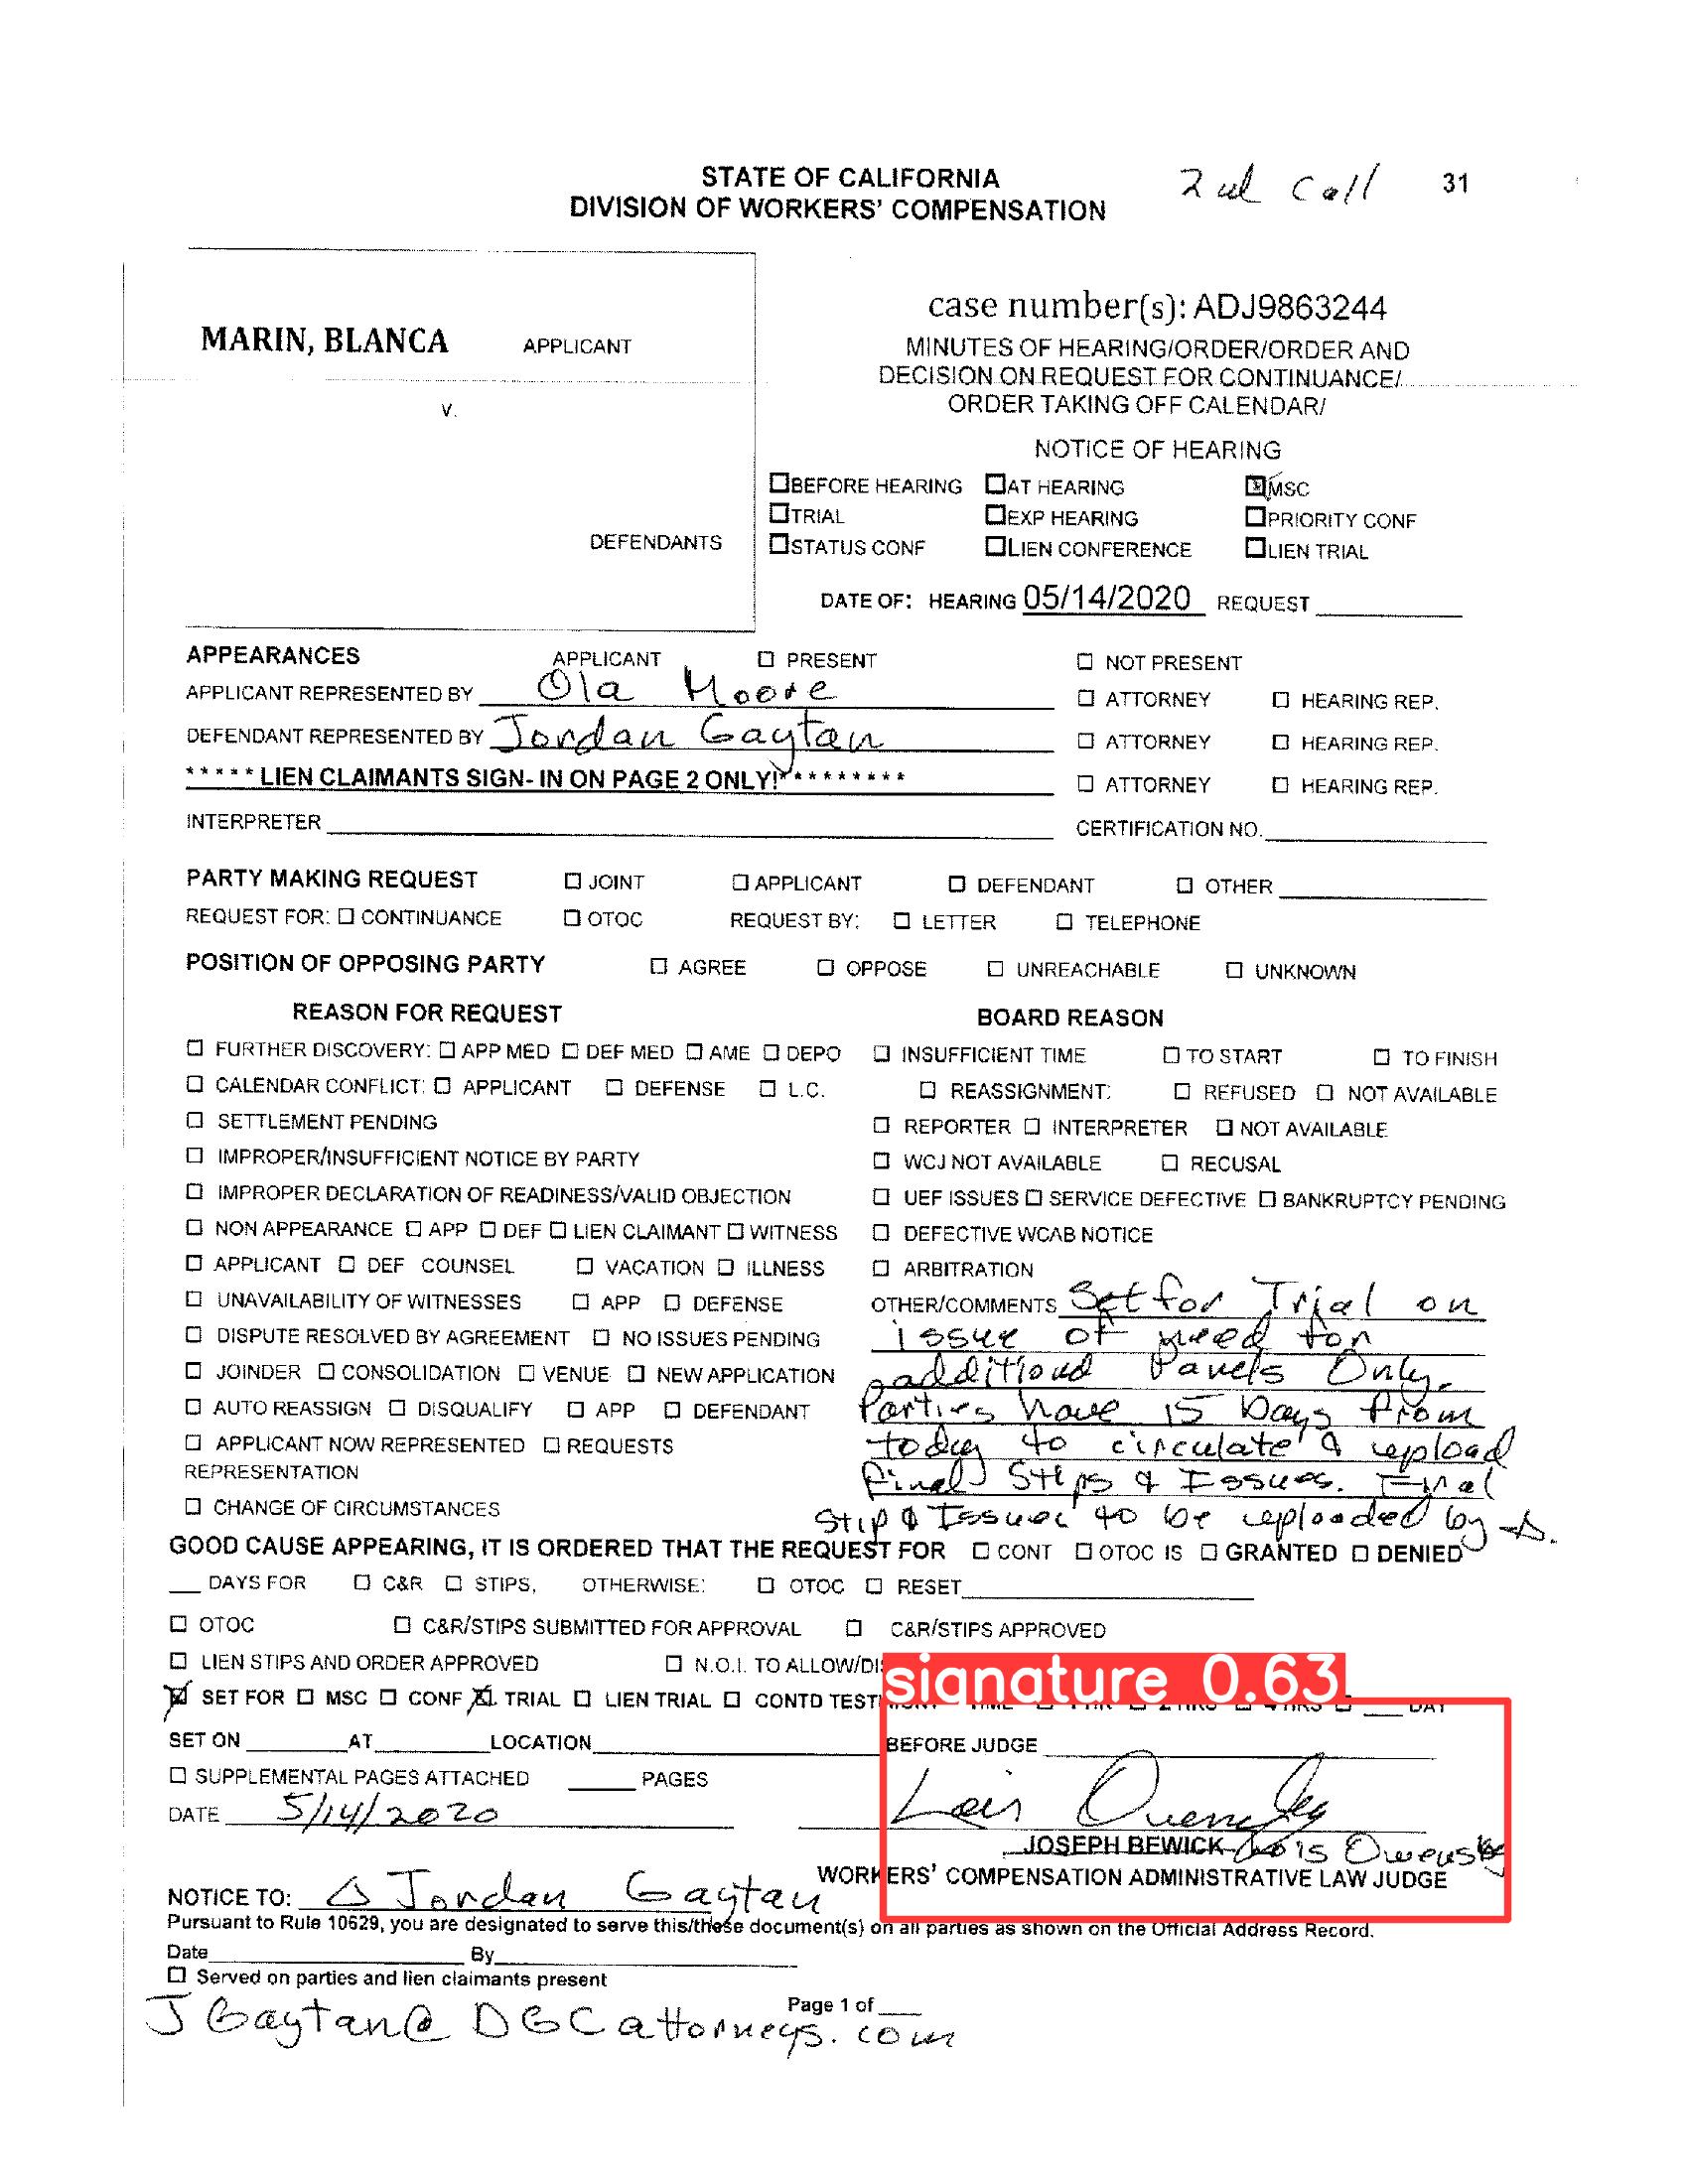

(%) Notice of Hearing
File '413206_Hearing_Minutes-of-Hearing_08172020020201_MOH_Mails-(37)_merged.txt' classified and saved to 'OutputOfDocPipeline/ClassficationResult/Court Fillings/Notice of Hearing/413206_Hearing_Minutes-of-Hearing_08172020020201_MOH_Mails-(37)_merged.txt'
          Process                         Domain     Main Document Type  \
19        Billing    Legal and Court Proceedings  Service Documentation   
211  Copy Records  Legal and Compliance Services     Service of Process   

    Sub Document Type         Documents  ... Column6  Column7       Column8  \
19   Proof of Service  Proof of Service  ...     NaN  Studies  Issued Date    
211  Proof of Service  Proof of Service  ...     NaN      NaN           NaN   

        Column9                                         Extraction  
19   Important   ["PATIENT FIRST NAME","PATIENT LAST NAME","CLA...  
211  Important   ["PATIENT FIRST NAME","PATIENT LAST NAME","CLA...  

[2 rows x 19 columns]
Alternative: nan
Object Dete

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-4 Python-3.9.16 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)

Fusing layers... 


Exception: CUDA out of memory. Tried to allocate 16.00 MiB (GPU 0; 23.69 GiB total capacity; 1.06 GiB already allocated; 9.44 MiB free; 1.08 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

In [2]:
#Doc Classification
from Document_Classfication import TextClassifier
category_file_path = 'Updated_Final.xlsx'
#input_folder_path = 'OutputOfDocPipeline/HYBRID-OCR-RESULT'
input_folder_path = 'OutputOfDocPipeline/Not_Classified'
#output_folder_path = 'OutputOfDocPipeline/OUTPUT-HYBRID-OCR-RESULT'
output_folder_path = 'OutputOfDocPipeline/ClassficationResult'

text_classifier = TextClassifier(category_file_path, input_folder_path, output_folder_path)
text_classifier.process_text_files()
text_classifier.display_accuracy_counts()

In [4]:
#Merge multiple txt ocr to single txt file
import os
import shutil
from Document_Text_Processing import TextProcessor
text_processor = TextProcessor()

In [5]:
# Specify the input folder containing text files and the folder containing PDF files
#input_folder_path = 'OutputOfDocPipeline/OUTPUT-HYBRID-OCR-RESULT'
input_folder_path = 'OutputOfDocPipeline/ClassficationResult'
pdf_folder_path = 'SamplePDFs'

# Call the function to find matching PDF files
text_processor.find_matching_pdf(input_folder_path, pdf_folder_path)

In [6]:
import os
import shutil

def find_and_copy_json(txt_path, json_destination):
    print("Here")
    # Iterate through all files and subdirectories in the txt_path
    for root, dirs, files in os.walk(txt_path):
        for file in files:
           
            # Check if the file has a .txt extension
            if file.endswith(".txt"):
                
                txt_file_path = os.path.join(root, file)

                # Construct the corresponding json file path
                json_file_path = os.path.join(json_destination, file.replace(".txt", ".json"))

                # Check if the corresponding json file exists
                if os.path.exists(json_file_path):
                    # Copy the json file to the same location as the txt file
                    shutil.copy(json_file_path, os.path.dirname(txt_file_path))

# Specify the path where the txt files are located
txt_path = "OutputOfDocPipeline/ClassficationResult/Not_Classified"

# Specify the path where the json files are located
json_destination = "OutputOfDocPipeline/ClassficationResult/Not_Classified"

# Call the function to find and copy json files corresponding to txt files
find_and_copy_json(txt_path, json_destination)

Here
